In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATDynamic, nets
from NEATModels.config  import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/FinalONEATTraining/MicroscopeDivisionData/'
npz_name = 'offsetmicroneatbin2.npz'
npz_val_name = 'offsetmicroneatbin2val.npz'
model_dir = '/home/sancere/Kepler/FinalONEATTraining/Microneatmodel/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'offsetmicroseqnetbin2d56.h5'

In [3]:
division_categories_json = model_dir + 'MicroscopeCategories.json'
key_categories = load_json(division_categories_json)
division_cord_json = model_dir + 'MicroscopeCord.json'
key_cord = load_json(division_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
lstm_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 56
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 8
# use softmax for single event per box, sigmoid for multi event per box
lstm_hidden_unit = 16
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True

size_tminus = 3
size_tplus = 0
imagex = 64
imagey = 64

In [4]:
config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         
                         key_categories = key_categories, key_cord = key_cord, nboxes = nboxes, imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         lstm_kernel = lstm_kernel, lstm_hidden_unit = lstm_hidden_unit, show = show,
                         startfiler = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=8, box_vector=5, categories=2, depth=56, epochs=250, imagex=64, imagey=64, key_categories={'Normal': 0, 'Division': 1}, key_cord={'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4}, learning_rate=0.0001, lstm_hidden_unit=16, lstm_kernel=3, mid_kernel=3, model_name='offsetmicroseqnetbin2d56.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/FinalONEATTraining/OffsetMicroscopeDivisionData/', npz_name='offsetmicroneatbin2.npz', npz_val_name='offsetmicroneatbin2val.npz', residual=False, show=True, size_tminus=3, size_tplus=0, start_kernel=7, startfilter=48, stride=4, yolo_v0=True, yolo_v1=False, yolo_v2=False)


(27397, 4, 64, 64, 1) (27397, 7, 1)
number of  images:	 27397
image size (3D):		 (4, 64, 64)
axes:				 STXYC
channels in / out:		 1
(1442, 4, 64, 64, 1) (1442, 7, 1)
number of  images:	 1442
image size (3D):		 (4, 64, 64)
axes:				 STXYC
channels in / out:		 1
(27397, 7, 1)
5
(27397, 1, 1, 7) 1


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
2021-07-02 11:31:46.447699: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-02 11:31:46.524171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.64GiB deviceMemoryBandwidth: 625.94GiB/s
2021-07-02 11:31:46.524493: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-07-02 11:31:46.526775: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynam

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 4, None, None 0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 4, None, None 2400        input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 4, None, None 16512       input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 4, None, None 192         time_distributed_1[0][0]         
____________________________________________________________________________________________

Train on 27397 samples, validate on 1442 samples
Epoch 1/250


2021-07-02 11:32:11.873476: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-07-02 11:32:14.517893: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


27397/27397 [==============================] - 1360s 50ms/step - loss: 1.7964 - accuracy: 0.2159 - val_loss: 1.6705 - val_accuracy: 0.4646

Epoch 00001: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


<Figure size 432x288 with 0 Axes>

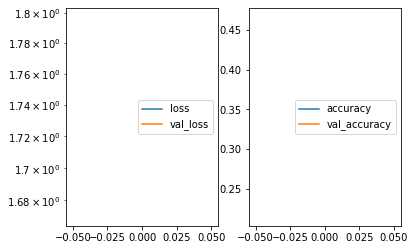

Predicted cell: Division Probability: [[0.9798701]]
True Cell type: Division
x [[0.3284727]]
True positional value x 0.34375
y [[0.54252875]]
True positional value y 0.65625
t [[0.9942992]]
True positional value t 1.0
h [[0.288422]]
True positional value h 0.140625
w [[0.22809109]]
True positional value w 0.203125


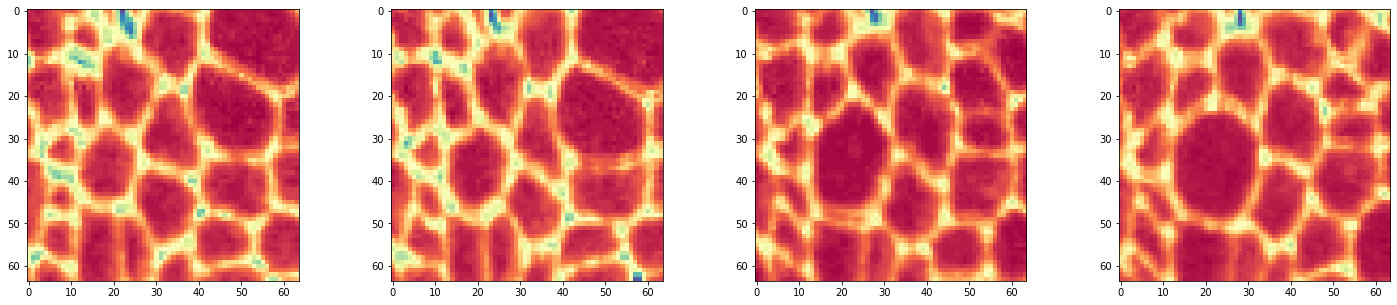

Epoch 2/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.6494 - accuracy: 0.5591 - val_loss: 1.5734 - val_accuracy: 0.5700

Epoch 00002: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


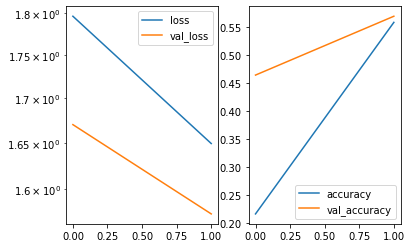

Predicted cell: Division Probability: [[0.99752706]]
True Cell type: Division
x [[0.6188049]]
True positional value x 0.65625
y [[0.6721412]]
True positional value y 0.65625
t [[0.99831426]]
True positional value t 1.0
h [[0.225175]]
True positional value h 0.234375
w [[0.2552761]]
True positional value w 0.21875


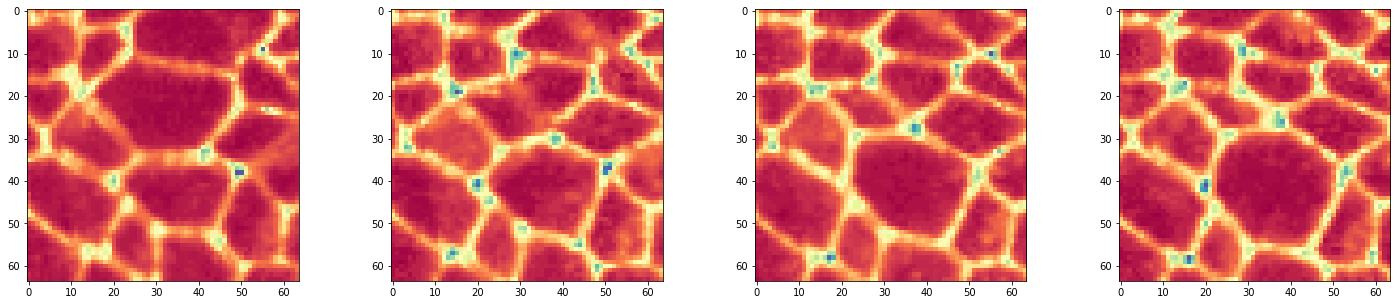

Epoch 3/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 1.5755 - accuracy: 0.6907 - val_loss: 1.5321 - val_accuracy: 0.6325

Epoch 00003: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


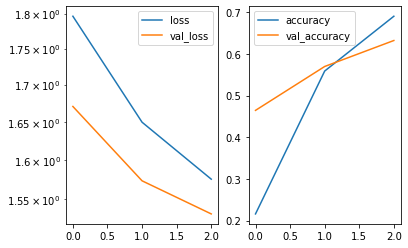

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.49882534]]
True positional value x 0.5
y [[0.45613965]]
True positional value y 0.34375
t [[0.9933333]]
True positional value t 1.0
h [[0.287715]]
True positional value h 0.265625
w [[0.3522143]]
True positional value w 0.296875


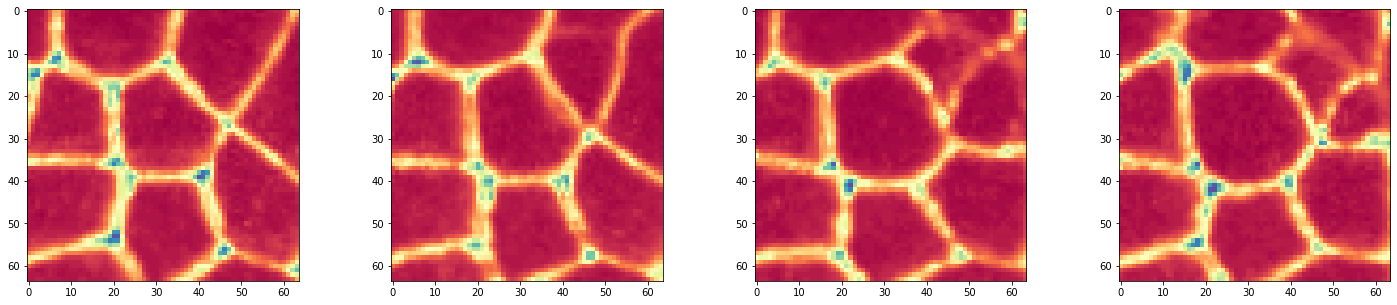

Epoch 4/250
27397/27397 [==============================] - 1347s 49ms/step - loss: 1.5261 - accuracy: 0.7620 - val_loss: 1.5040 - val_accuracy: 0.7594

Epoch 00004: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


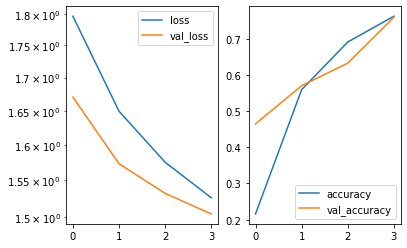

Predicted cell: Division Probability: [[0.975547]]
True Cell type: Division
x [[0.5155224]]
True positional value x 0.34375
y [[0.48670363]]
True positional value y 0.5
t [[0.9723858]]
True positional value t 1.0
h [[0.29531273]]
True positional value h 0.203125
w [[0.3495783]]
True positional value w 0.203125


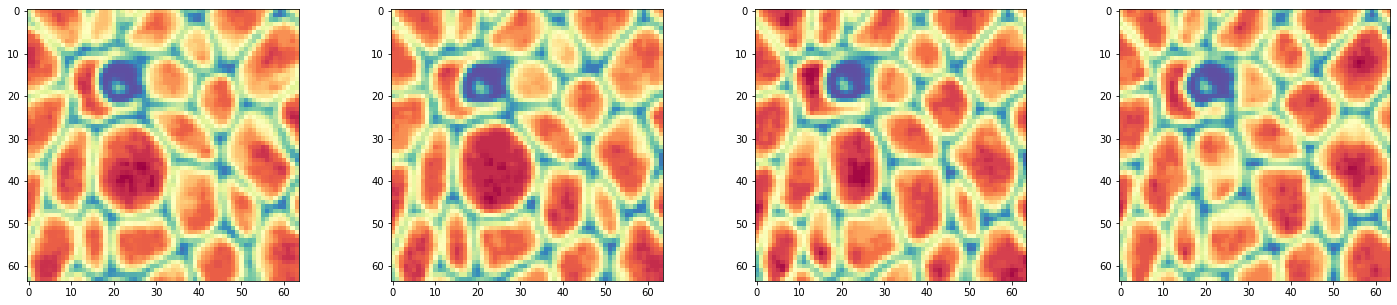

Epoch 5/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 1.4870 - accuracy: 0.8498 - val_loss: 1.4807 - val_accuracy: 0.8870

Epoch 00005: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


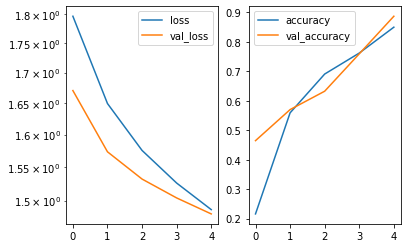

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.66185904]]
True positional value x 0.65625
y [[0.4652359]]
True positional value y 0.5
t [[0.99818784]]
True positional value t 1.0
h [[0.39190143]]
True positional value h 0.453125
w [[0.46166265]]
True positional value w 0.5


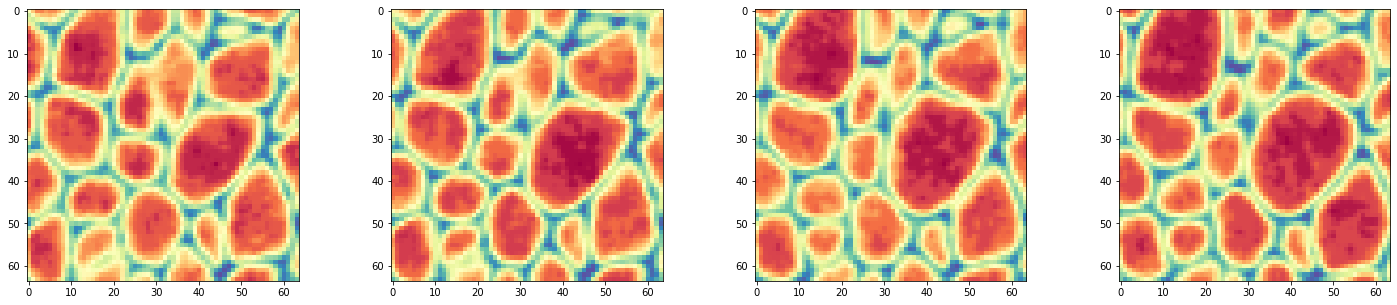

Epoch 6/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 1.4657 - accuracy: 0.8741 - val_loss: 1.4555 - val_accuracy: 0.9043

Epoch 00006: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


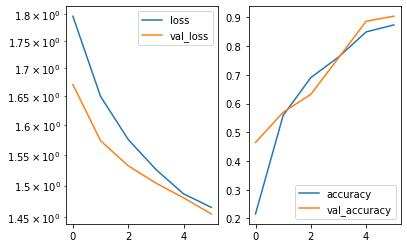

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.6386607]]
True positional value x 0.65625
y [[0.57813877]]
True positional value y 0.65625
t [[0.99535877]]
True positional value t 1.0
h [[0.27992266]]
True positional value h 0.265625
w [[0.34584963]]
True positional value w 0.234375


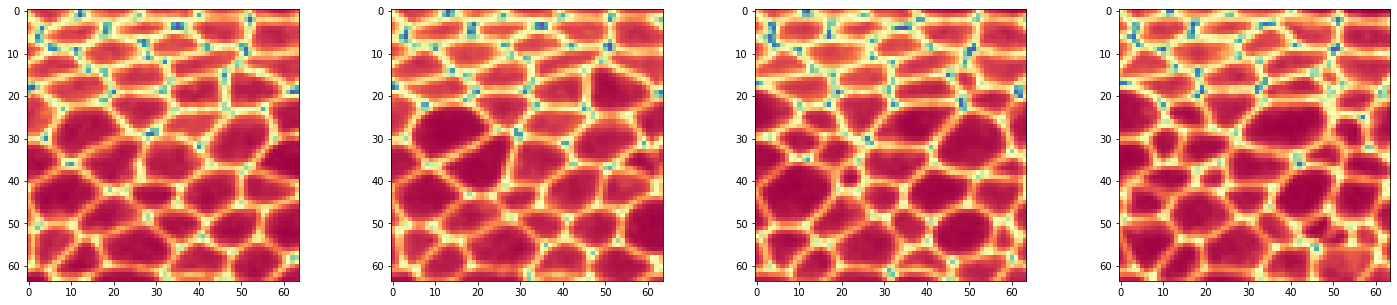

Epoch 7/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.4357 - accuracy: 0.9142 - val_loss: 1.4212 - val_accuracy: 0.9445

Epoch 00007: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


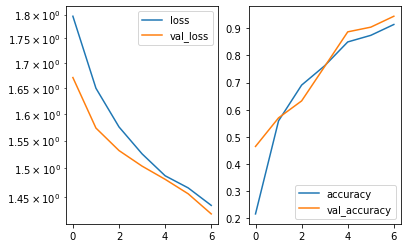

Predicted cell: Normal Probability: [[0.9999387]]
True Cell type: Normal
x [[0.5014612]]
True positional value x 0.5
y [[0.49103436]]
True positional value y 0.5
t [[0.9958189]]
True positional value t 1.0
h [[0.12526448]]
True positional value h 0.109375
w [[0.11977]]
True positional value w 0.078125


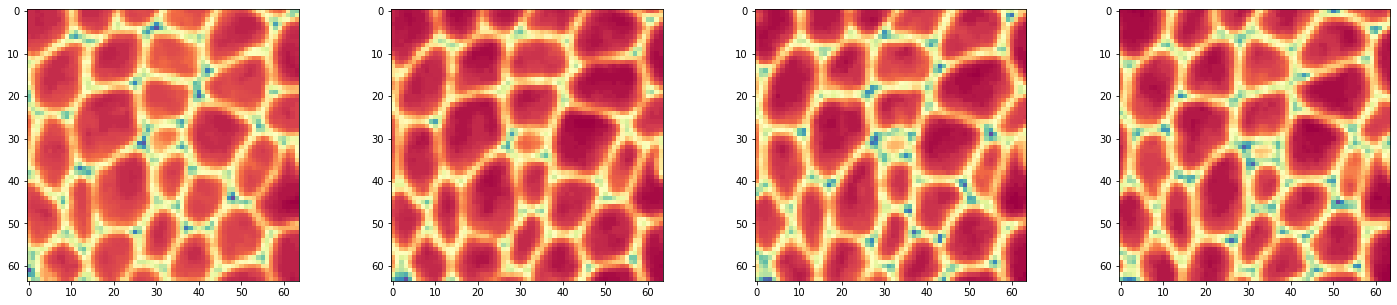

Epoch 8/250
27397/27397 [==============================] - 1341s 49ms/step - loss: 1.4151 - accuracy: 0.9156 - val_loss: 1.4252 - val_accuracy: 0.9043

Epoch 00008: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


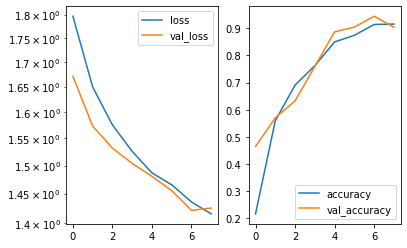

Predicted cell: Division Probability: [[0.9999486]]
True Cell type: Division
x [[0.44119865]]
True positional value x 0.5
y [[0.5845541]]
True positional value y 0.65625
t [[0.9983718]]
True positional value t 1.0
h [[0.17974469]]
True positional value h 0.15625
w [[0.1838118]]
True positional value w 0.25


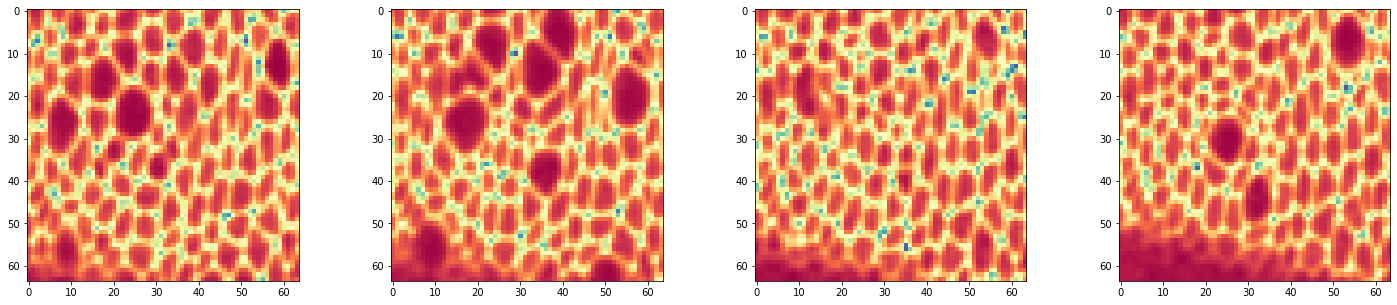

Epoch 9/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.3935 - accuracy: 0.9332 - val_loss: 1.4028 - val_accuracy: 0.9057

Epoch 00009: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


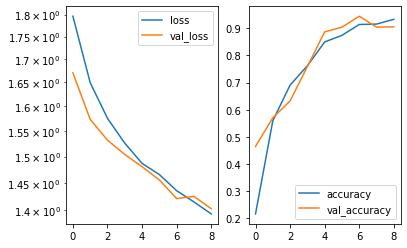

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.47277904]]
True positional value x 0.5
y [[0.6886811]]
True positional value y 0.65625
t [[0.999315]]
True positional value t 1.0
h [[0.45464432]]
True positional value h 0.453125
w [[0.52479607]]
True positional value w 0.5


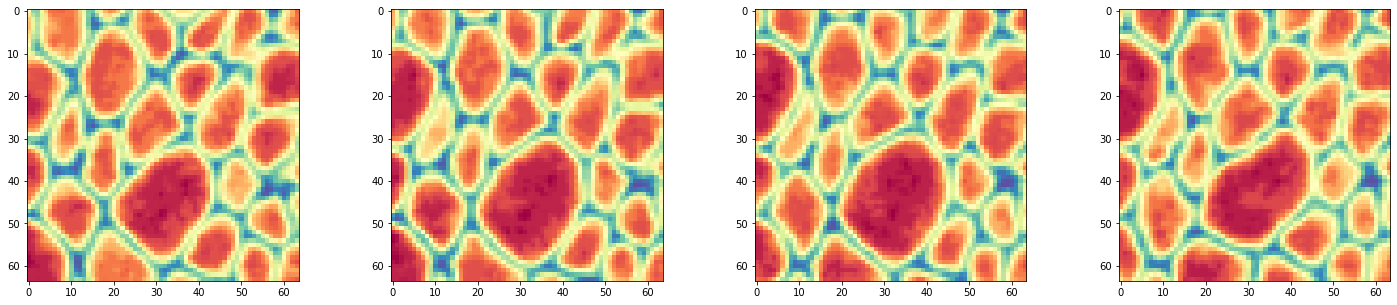

Epoch 10/250
27397/27397 [==============================] - 1342s 49ms/step - loss: 1.3744 - accuracy: 0.9479 - val_loss: 1.3691 - val_accuracy: 0.9660

Epoch 00010: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


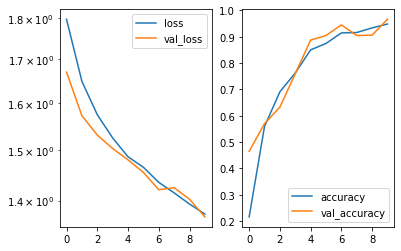

Predicted cell: Division Probability: [[0.9999999]]
True Cell type: Division
x [[0.52036285]]
True positional value x 0.65625
y [[0.51886624]]
True positional value y 0.65625
t [[0.9994319]]
True positional value t 1.0
h [[0.16451149]]
True positional value h 0.140625
w [[0.18673964]]
True positional value w 0.203125


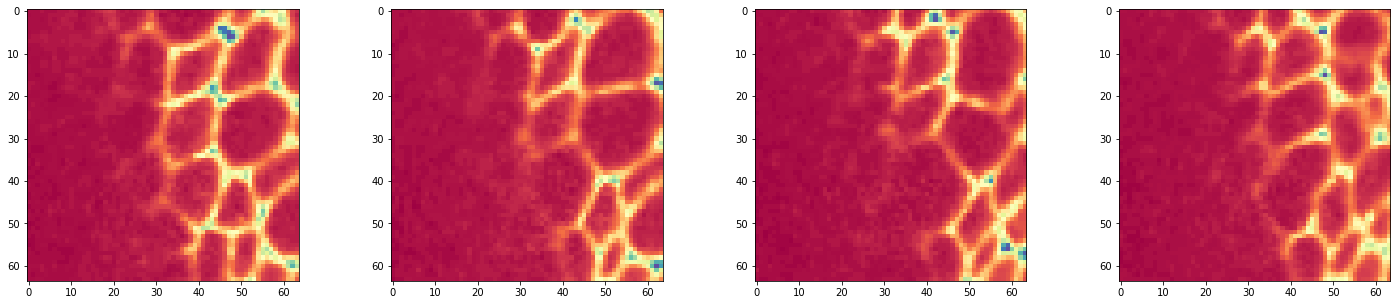

Epoch 11/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.3531 - accuracy: 0.9550 - val_loss: 1.3635 - val_accuracy: 0.9584

Epoch 00011: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


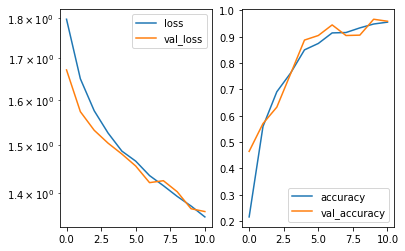

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.5698659]]
True positional value x 0.5
y [[0.63669]]
True positional value y 0.5
t [[0.9986998]]
True positional value t 1.0
h [[0.35304937]]
True positional value h 0.359375
w [[0.3383596]]
True positional value w 0.421875


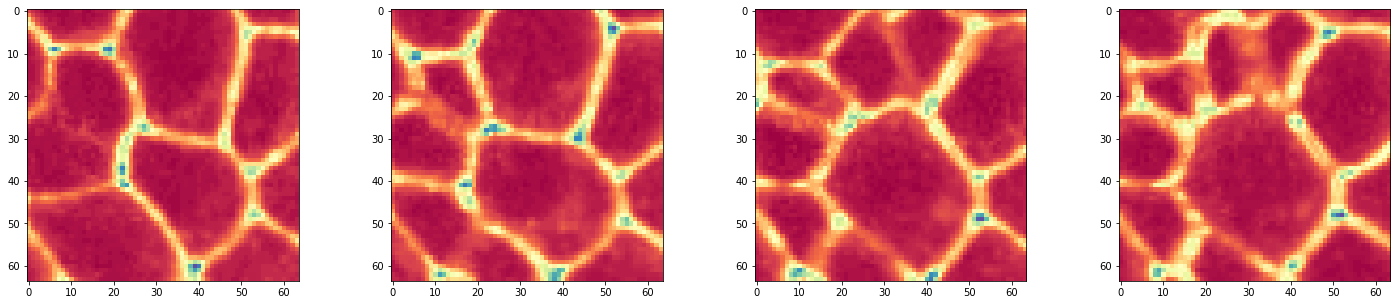

Epoch 12/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.3314 - accuracy: 0.9719 - val_loss: 1.3422 - val_accuracy: 0.9501

Epoch 00012: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


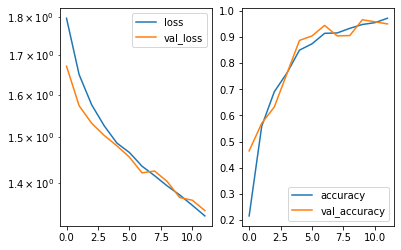

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4827692]]
True positional value x 0.5
y [[0.43738696]]
True positional value y 0.34375
t [[0.9988175]]
True positional value t 1.0
h [[0.19110616]]
True positional value h 0.109375
w [[0.18678212]]
True positional value w 0.234375


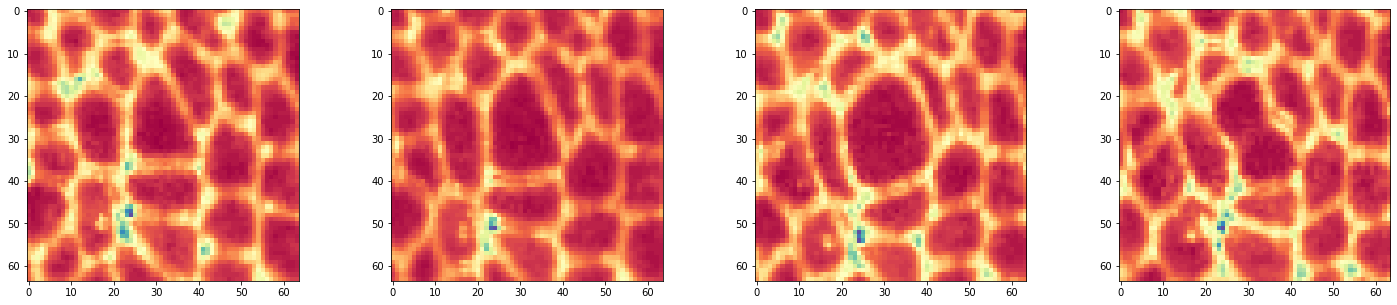

Epoch 13/250
27397/27397 [==============================] - 1343s 49ms/step - loss: 1.3140 - accuracy: 0.9738 - val_loss: 1.3212 - val_accuracy: 0.9632

Epoch 00013: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


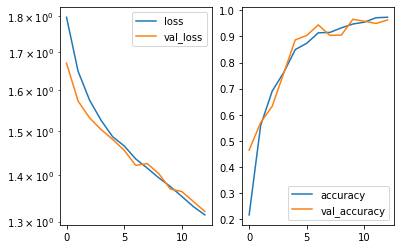

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.32062554]]
True positional value x 0.34375
y [[0.6416999]]
True positional value y 0.65625
t [[0.99900216]]
True positional value t 1.0
h [[0.11697232]]
True positional value h 0.15625
w [[0.14482273]]
True positional value w 0.15625


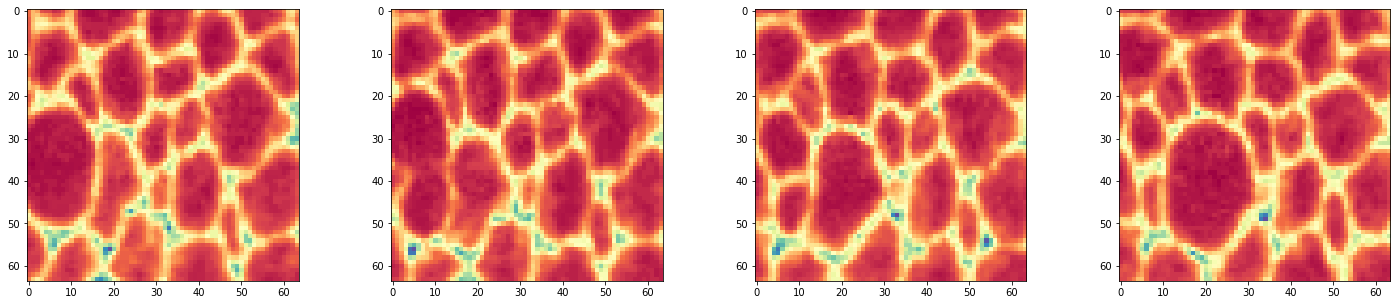

Epoch 14/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 1.2970 - accuracy: 0.9694 - val_loss: 1.3168 - val_accuracy: 0.9778

Epoch 00014: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


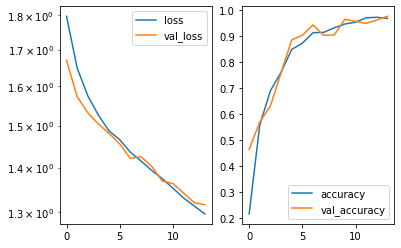

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.37208563]]
True positional value x 0.34375
y [[0.34497052]]
True positional value y 0.34375
t [[0.99715567]]
True positional value t 1.0
h [[0.25262907]]
True positional value h 0.28125
w [[0.19044037]]
True positional value w 0.203125


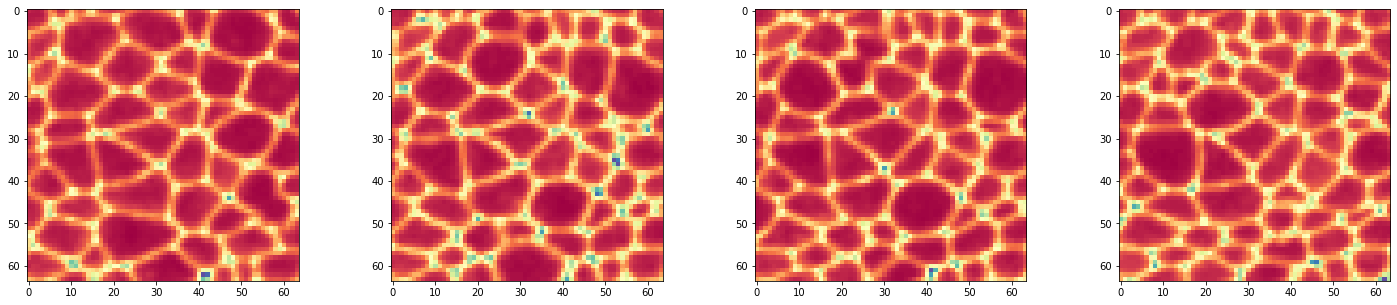

Epoch 15/250
27397/27397 [==============================] - 1361s 50ms/step - loss: 1.2815 - accuracy: 0.9722 - val_loss: 1.2881 - val_accuracy: 0.9730

Epoch 00015: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


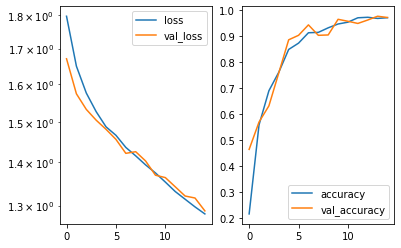

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.43873408]]
True positional value x 0.34375
y [[0.32810488]]
True positional value y 0.34375
t [[0.99878603]]
True positional value t 1.0
h [[0.23023954]]
True positional value h 0.171875
w [[0.3045655]]
True positional value w 0.234375


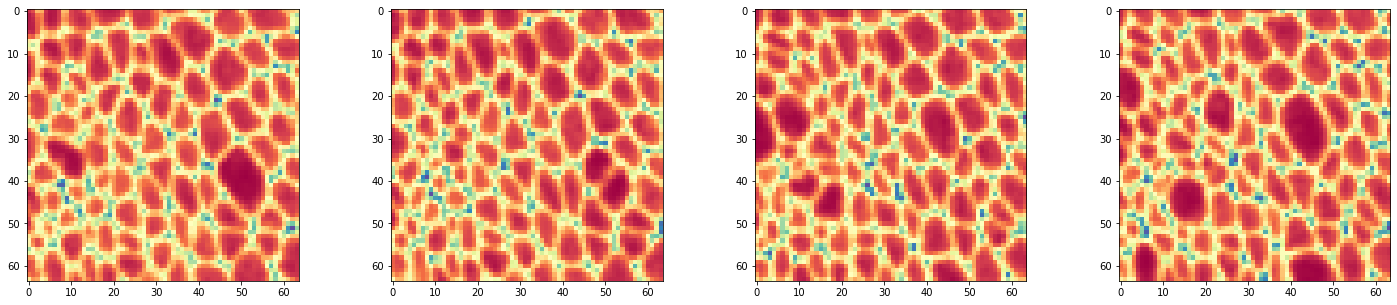

Epoch 16/250
27397/27397 [==============================] - 1361s 50ms/step - loss: 1.2664 - accuracy: 0.9670 - val_loss: 1.2732 - val_accuracy: 0.9293

Epoch 00016: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


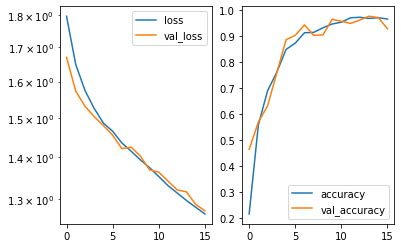

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.341776]]
True positional value x 0.34375
y [[0.49082237]]
True positional value y 0.5
t [[0.99721164]]
True positional value t 1.0
h [[0.36495546]]
True positional value h 0.421875
w [[0.38543057]]
True positional value w 0.515625


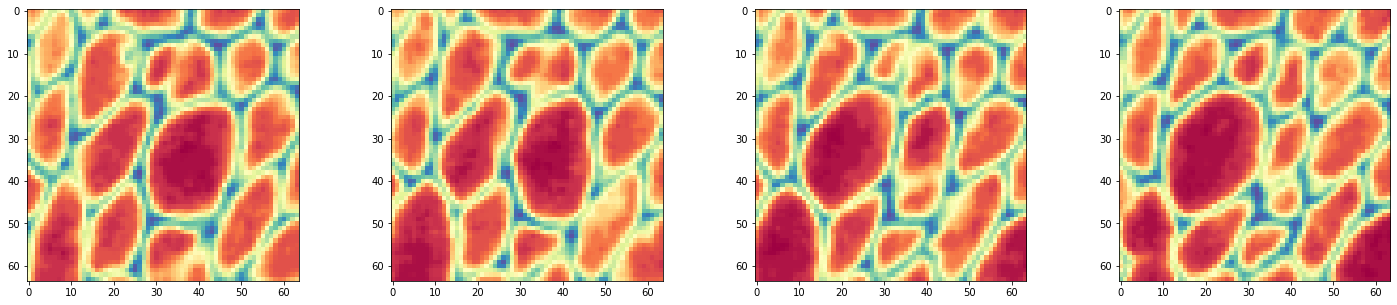

Epoch 17/250
27397/27397 [==============================] - 1336s 49ms/step - loss: 1.2468 - accuracy: 0.9776 - val_loss: 1.2503 - val_accuracy: 0.9563

Epoch 00017: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


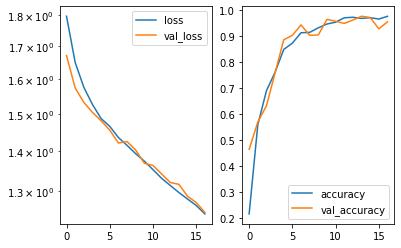

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.24496056]]
True positional value x 0.34375
y [[0.48230487]]
True positional value y 0.65625
t [[0.999647]]
True positional value t 1.0
h [[0.18264215]]
True positional value h 0.15625
w [[0.22643605]]
True positional value w 0.203125


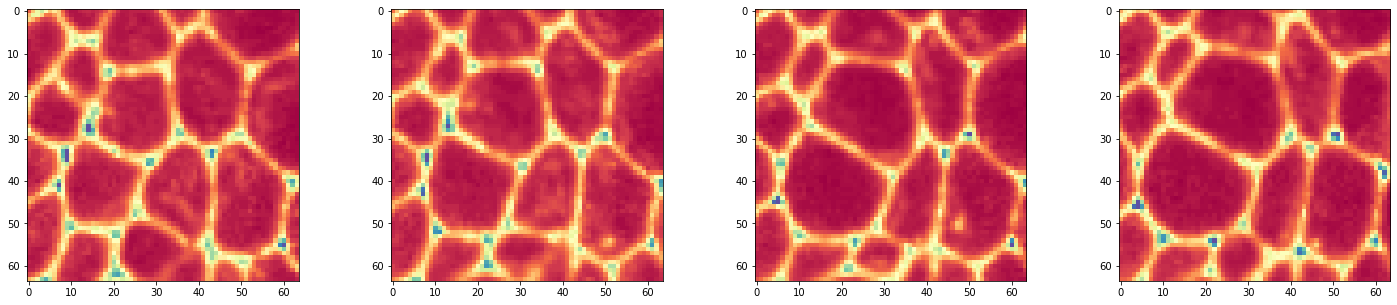

Epoch 18/250
27397/27397 [==============================] - 1348s 49ms/step - loss: 1.2300 - accuracy: 0.9865 - val_loss: 1.2516 - val_accuracy: 0.9820

Epoch 00018: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


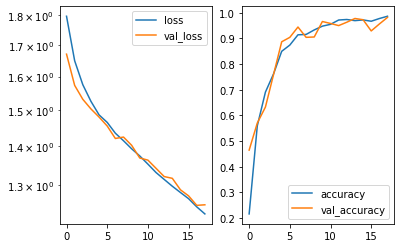

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4698621]]
True positional value x 0.34375
y [[0.35600668]]
True positional value y 0.5
t [[0.9996933]]
True positional value t 1.0
h [[0.15035059]]
True positional value h 0.140625
w [[0.17531496]]
True positional value w 0.1875


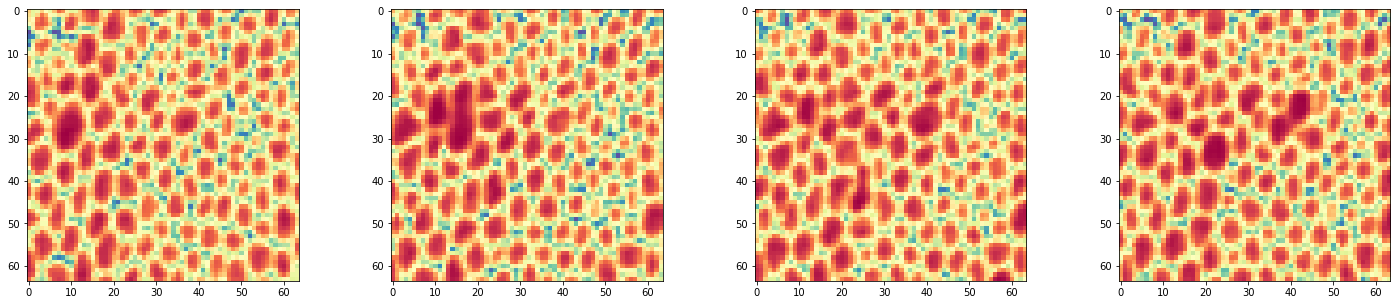

Epoch 19/250
27397/27397 [==============================] - 1340s 49ms/step - loss: 1.2176 - accuracy: 0.9777 - val_loss: 1.2254 - val_accuracy: 0.9674

Epoch 00019: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


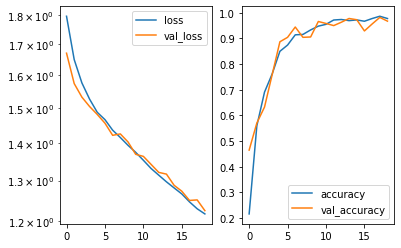

Predicted cell: Normal Probability: [[0.99994266]]
True Cell type: Normal
x [[0.5284228]]
True positional value x 0.5
y [[0.5015489]]
True positional value y 0.5
t [[0.9961662]]
True positional value t 1.0
h [[0.15395936]]
True positional value h 0.078125
w [[0.16418035]]
True positional value w 0.140625


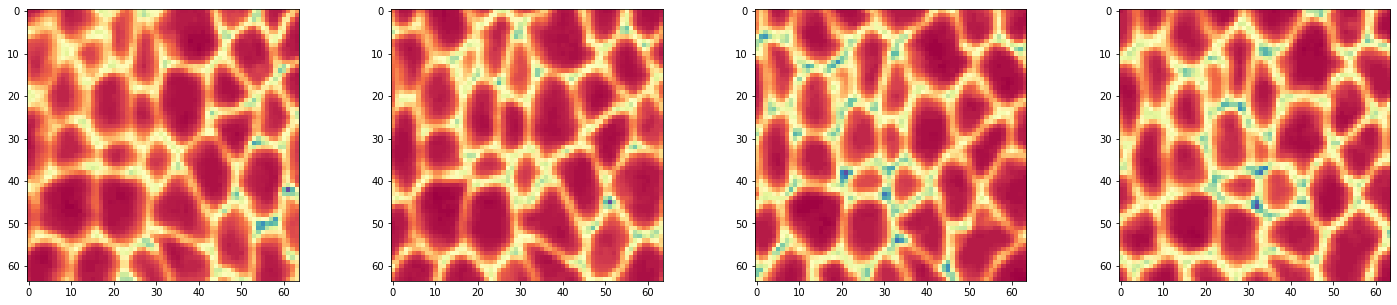

Epoch 20/250
27397/27397 [==============================] - 1339s 49ms/step - loss: 1.2009 - accuracy: 0.9743 - val_loss: 1.2245 - val_accuracy: 0.9300

Epoch 00020: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


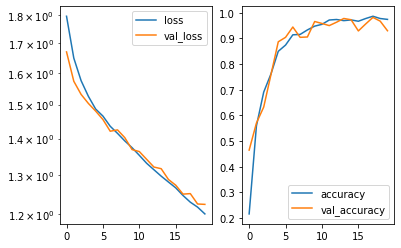

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4229292]]
True positional value x 0.5
y [[0.43425176]]
True positional value y 0.34375
t [[0.99853754]]
True positional value t 1.0
h [[0.31315708]]
True positional value h 0.265625
w [[0.22176291]]
True positional value w 0.25


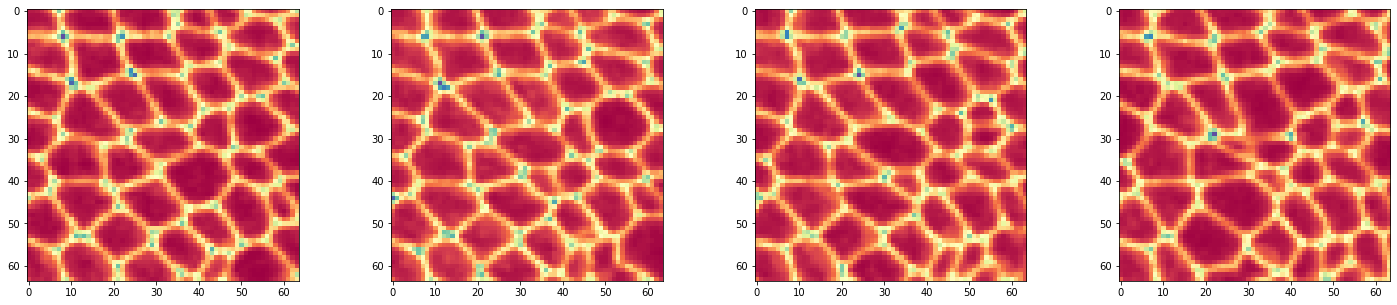

Epoch 21/250
27397/27397 [==============================] - 1340s 49ms/step - loss: 1.1860 - accuracy: 0.9718 - val_loss: 1.1915 - val_accuracy: 0.9792

Epoch 00021: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


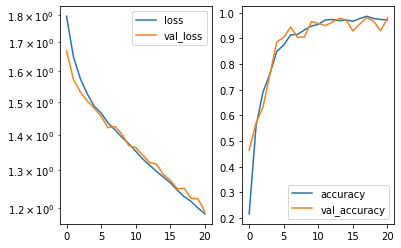

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4931281]]
True positional value x 0.5
y [[0.31612453]]
True positional value y 0.34375
t [[0.9942901]]
True positional value t 1.0
h [[0.40526775]]
True positional value h 0.4375
w [[0.3921621]]
True positional value w 0.421875


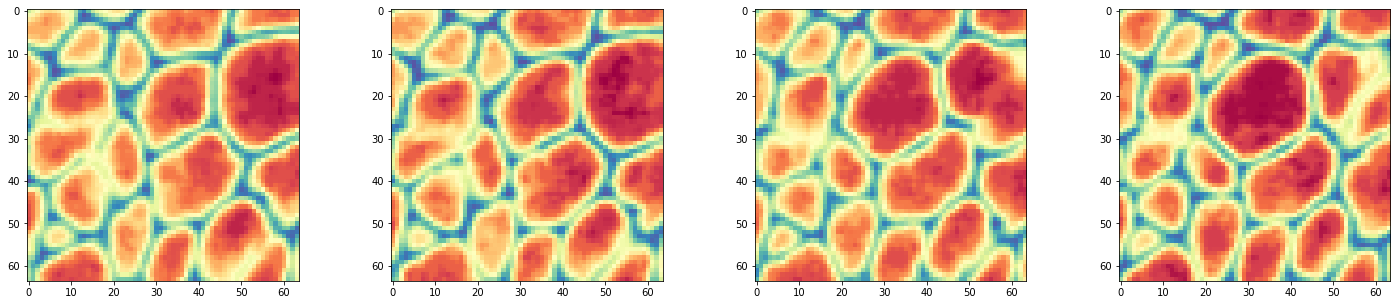

Epoch 22/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 1.1666 - accuracy: 0.9911 - val_loss: 1.1785 - val_accuracy: 0.9834

Epoch 00022: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


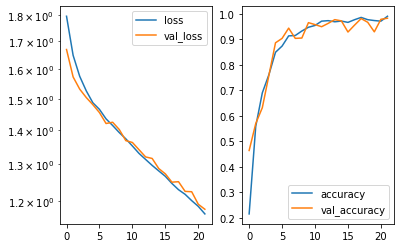

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.62393445]]
True positional value x 0.65625
y [[0.37942612]]
True positional value y 0.34375
t [[0.99765414]]
True positional value t 1.0
h [[0.23759669]]
True positional value h 0.265625
w [[0.25637788]]
True positional value w 0.25


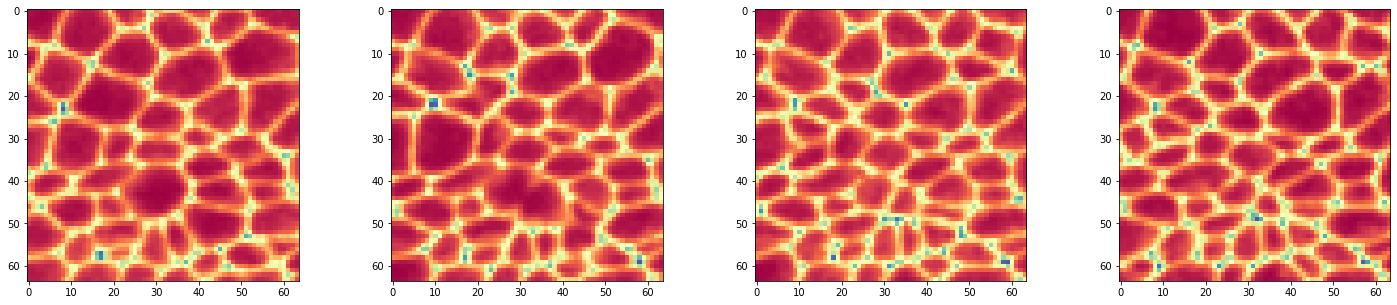

Epoch 23/250
27397/27397 [==============================] - 1333s 49ms/step - loss: 1.1507 - accuracy: 0.9945 - val_loss: 1.1645 - val_accuracy: 0.9840

Epoch 00023: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


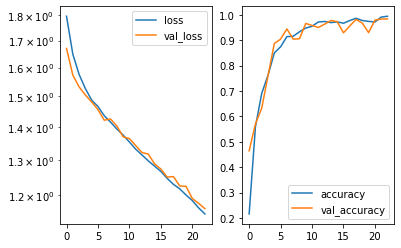

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
x [[0.488397]]
True positional value x 0.5
y [[0.48489872]]
True positional value y 0.5
t [[0.9953383]]
True positional value t 1.0
h [[0.24198395]]
True positional value h 0.296875
w [[0.1902354]]
True positional value w 0.234375


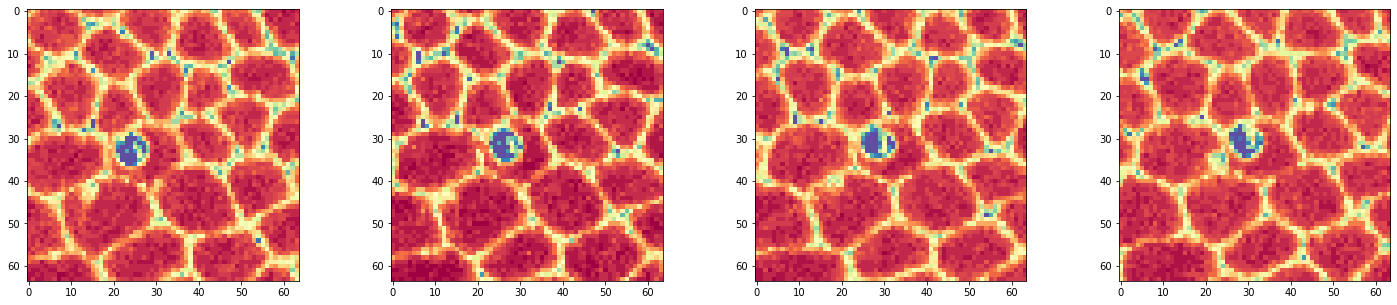

Epoch 24/250
27397/27397 [==============================] - 1328s 48ms/step - loss: 1.1371 - accuracy: 0.9899 - val_loss: 1.1482 - val_accuracy: 0.9840

Epoch 00024: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


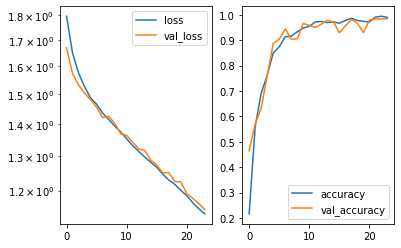

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.65682536]]
True positional value x 0.65625
y [[0.6596999]]
True positional value y 0.65625
t [[0.99634933]]
True positional value t 1.0
h [[0.3539753]]
True positional value h 0.390625
w [[0.47881255]]
True positional value w 0.5


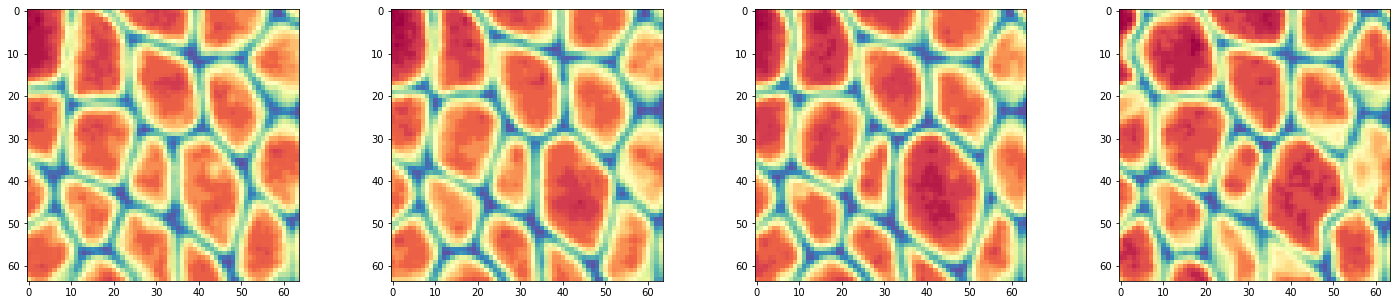

Epoch 25/250
27397/27397 [==============================] - 1326s 48ms/step - loss: 1.1220 - accuracy: 0.9915 - val_loss: 1.1399 - val_accuracy: 0.9771

Epoch 00025: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


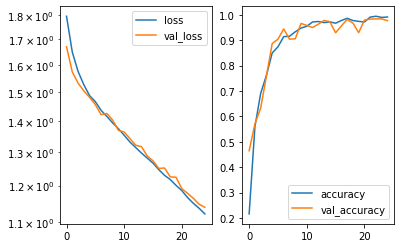

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.65508485]]
True positional value x 0.65625
y [[0.6532849]]
True positional value y 0.65625
t [[0.9931284]]
True positional value t 1.0
h [[0.39123023]]
True positional value h 0.46875
w [[0.44338948]]
True positional value w 0.4375


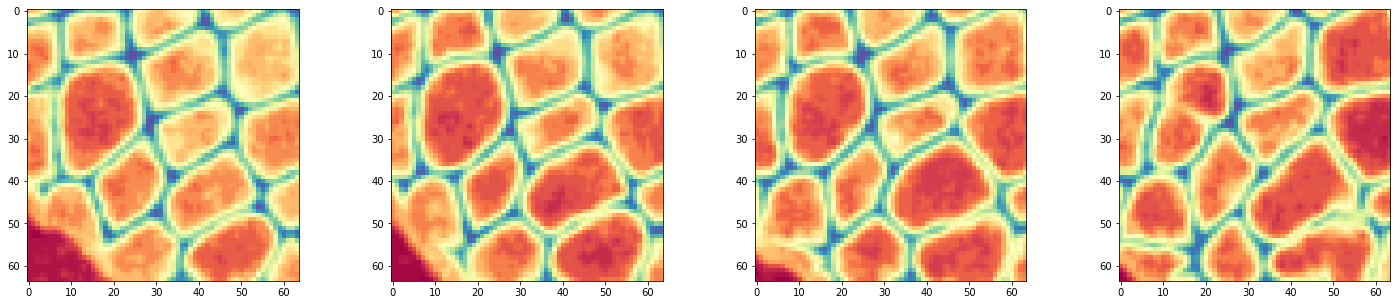

Epoch 26/250
27397/27397 [==============================] - 1360s 50ms/step - loss: 1.1112 - accuracy: 0.9801 - val_loss: 1.1302 - val_accuracy: 0.9598

Epoch 00026: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


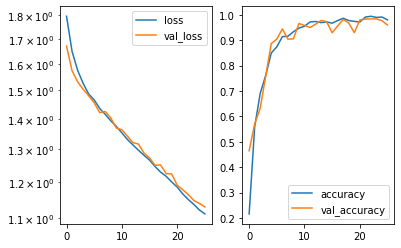

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.68387216]]
True positional value x 0.65625
y [[0.3256007]]
True positional value y 0.34375
t [[0.99814177]]
True positional value t 1.0
h [[0.2579332]]
True positional value h 0.265625
w [[0.2521745]]
True positional value w 0.265625


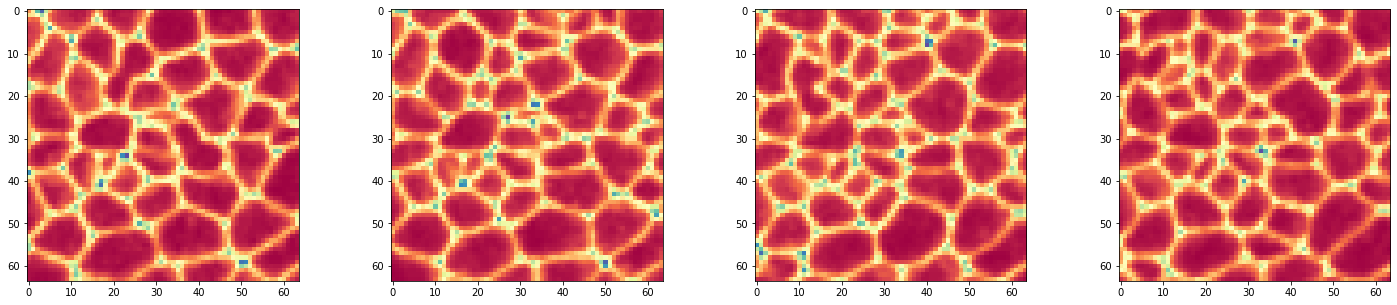

Epoch 27/250
27397/27397 [==============================] - 1356s 49ms/step - loss: 1.0957 - accuracy: 0.9835 - val_loss: 1.1039 - val_accuracy: 0.9806

Epoch 00027: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


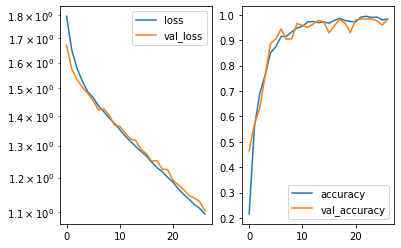

Predicted cell: Division Probability: [[0.99992263]]
True Cell type: Division
x [[0.5120571]]
True positional value x 0.5
y [[0.48773468]]
True positional value y 0.5
t [[0.99788]]
True positional value t 1.0
h [[0.43241405]]
True positional value h 0.40625
w [[0.3294242]]
True positional value w 0.28125


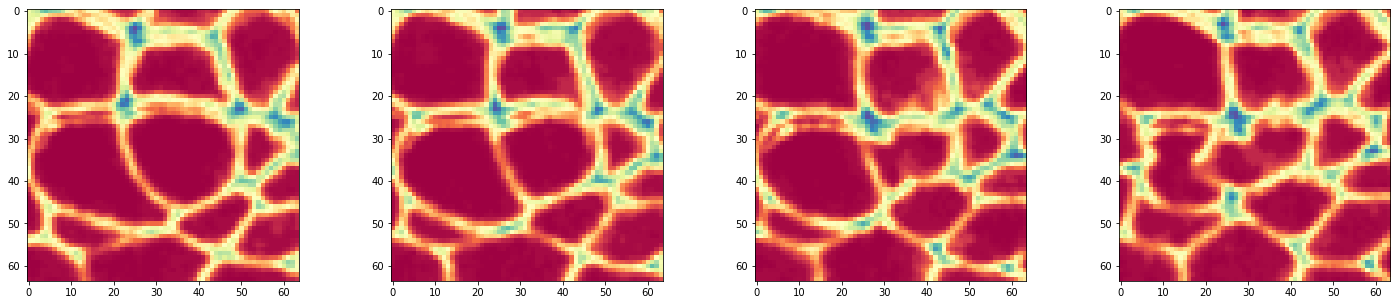

Epoch 28/250
27397/27397 [==============================] - 1352s 49ms/step - loss: 1.0794 - accuracy: 0.9954 - val_loss: 1.0898 - val_accuracy: 0.9820

Epoch 00028: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


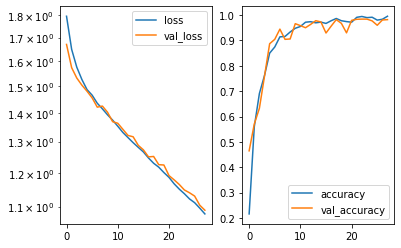

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.62297255]]
True positional value x 0.65625
y [[0.4991252]]
True positional value y 0.5
t [[0.99747366]]
True positional value t 1.0
h [[0.36046138]]
True positional value h 0.34375
w [[0.54228485]]
True positional value w 0.5


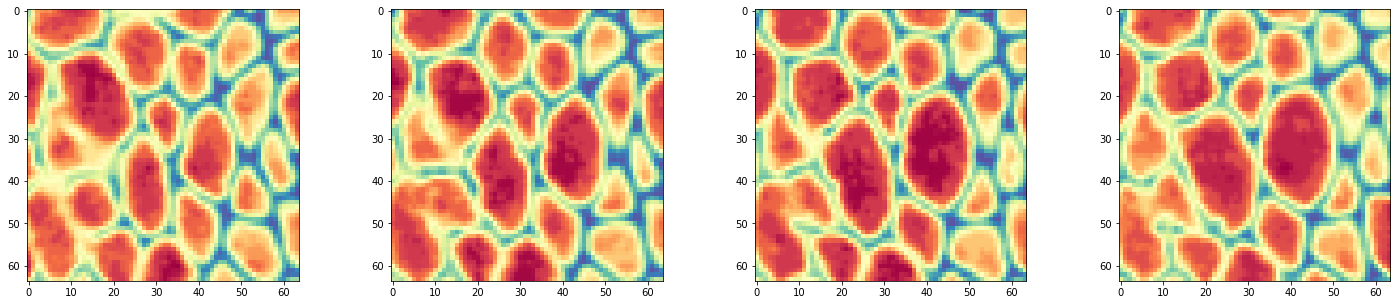

Epoch 29/250
27397/27397 [==============================] - 1354s 49ms/step - loss: 1.0655 - accuracy: 0.9959 - val_loss: 1.0749 - val_accuracy: 0.9820

Epoch 00029: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


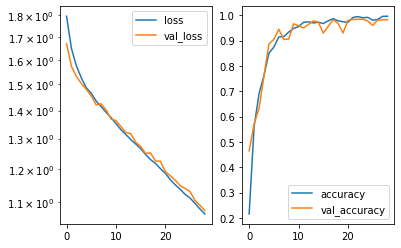

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.51034945]]
True positional value x 0.5
y [[0.35992315]]
True positional value y 0.34375
t [[0.9980799]]
True positional value t 1.0
h [[0.22758359]]
True positional value h 0.21875
w [[0.22195077]]
True positional value w 0.25


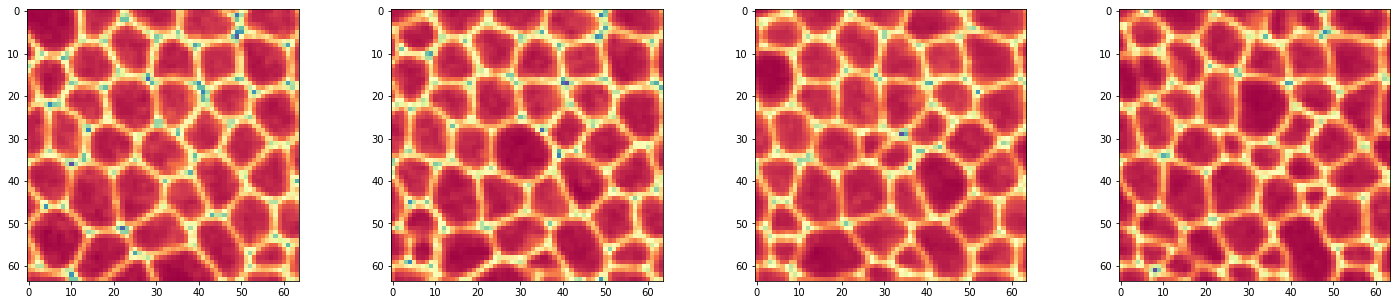

Epoch 30/250
27397/27397 [==============================] - 1360s 50ms/step - loss: 1.0522 - accuracy: 0.9946 - val_loss: 1.0679 - val_accuracy: 0.9778

Epoch 00030: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


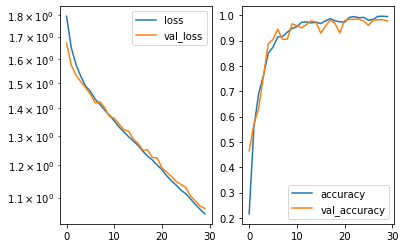

Predicted cell: Normal Probability: [[0.99999404]]
True Cell type: Normal
x [[0.46782878]]
True positional value x 0.5
y [[0.5224512]]
True positional value y 0.5
t [[0.9983803]]
True positional value t 1.0
h [[0.20895125]]
True positional value h 0.125
w [[0.1903118]]
True positional value w 0.109375


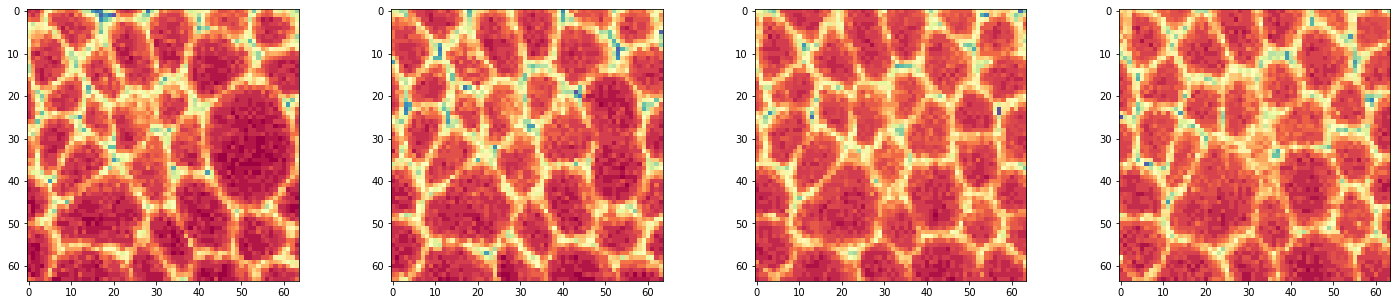

Epoch 31/250
27397/27397 [==============================] - 1350s 49ms/step - loss: 1.0394 - accuracy: 0.9926 - val_loss: 1.0477 - val_accuracy: 0.9771

Epoch 00031: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


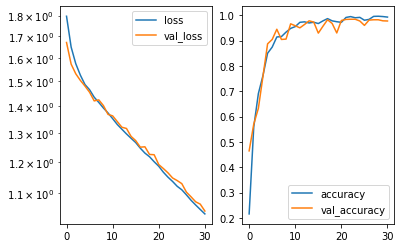

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.68036216]]
True positional value x 0.65625
y [[0.6865681]]
True positional value y 0.65625
t [[0.996197]]
True positional value t 1.0
h [[0.32594416]]
True positional value h 0.359375
w [[0.425258]]
True positional value w 0.40625


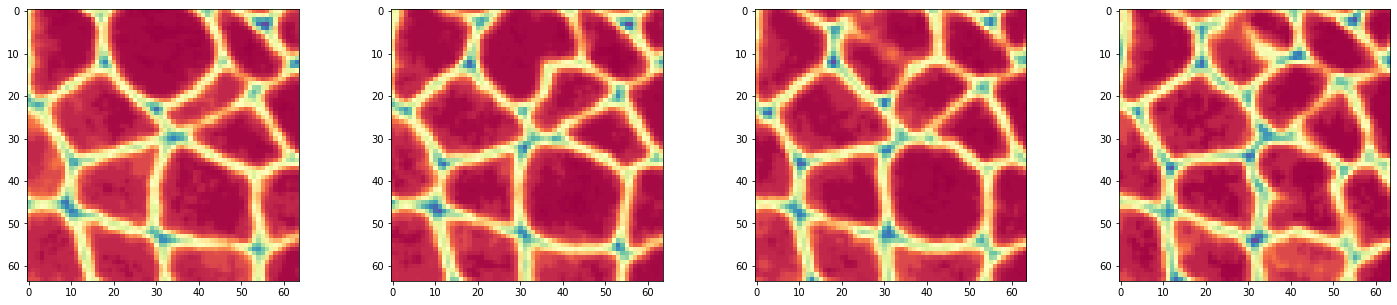

Epoch 32/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 1.0259 - accuracy: 0.9969 - val_loss: 1.0339 - val_accuracy: 0.9827

Epoch 00032: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


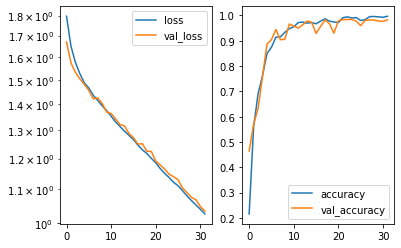

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4500218]]
True positional value x 0.5
y [[0.45783037]]
True positional value y 0.5
t [[0.9986916]]
True positional value t 1.0
h [[0.22507818]]
True positional value h 0.234375
w [[0.28438285]]
True positional value w 0.34375


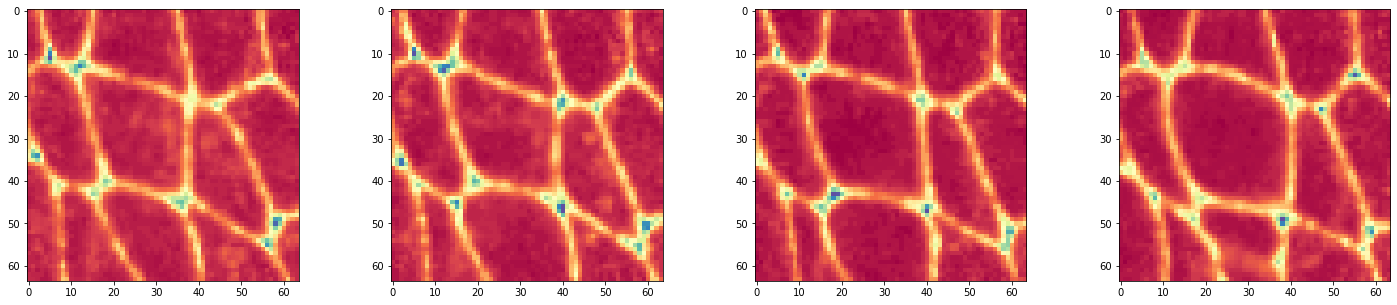

Epoch 33/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 1.0130 - accuracy: 0.9973 - val_loss: 1.0214 - val_accuracy: 0.9834

Epoch 00033: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


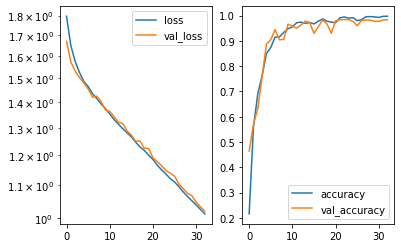

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.5224067]]
True positional value x 0.5
y [[0.48891476]]
True positional value y 0.5
t [[0.9988708]]
True positional value t 1.0
h [[0.29188094]]
True positional value h 0.28125
w [[0.32938433]]
True positional value w 0.359375


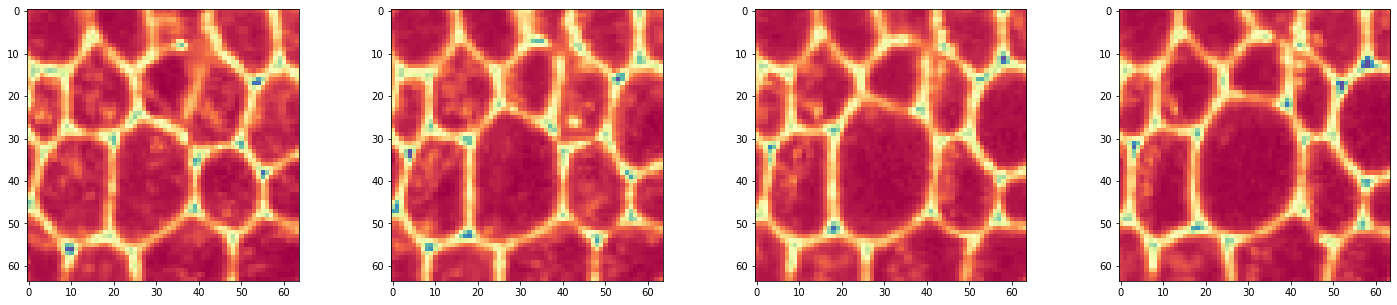

Epoch 34/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 1.0004 - accuracy: 0.9974 - val_loss: 1.0091 - val_accuracy: 0.9820

Epoch 00034: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


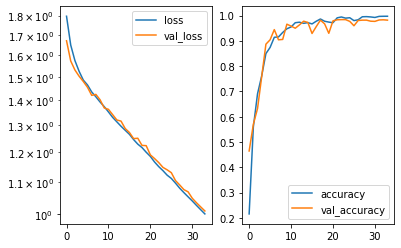

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4771665]]
True positional value x 0.5
y [[0.35739973]]
True positional value y 0.34375
t [[0.9983614]]
True positional value t 1.0
h [[0.3368177]]
True positional value h 0.34375
w [[0.30942786]]
True positional value w 0.265625


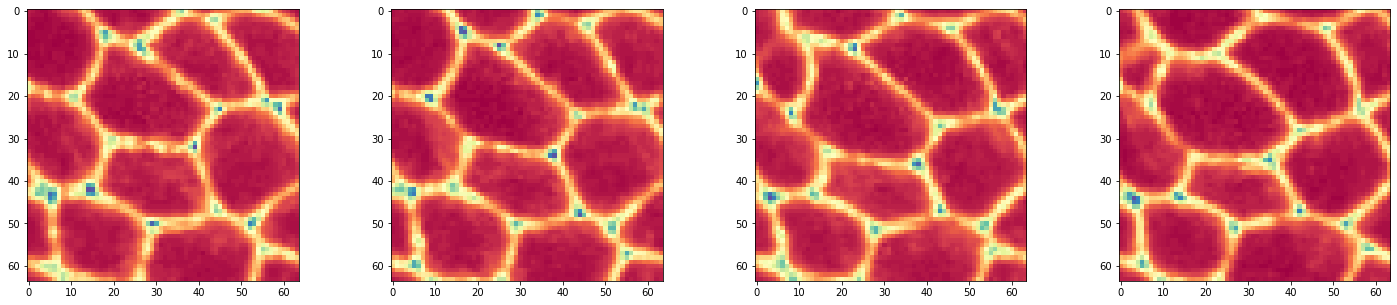

Epoch 35/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 0.9880 - accuracy: 0.9977 - val_loss: 0.9968 - val_accuracy: 0.9806

Epoch 00035: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


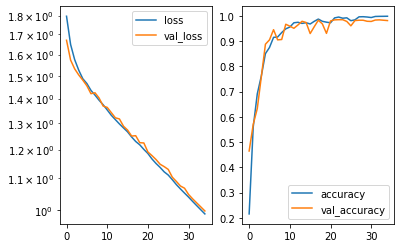

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.334099]]
True positional value x 0.34375
y [[0.34311074]]
True positional value y 0.34375
t [[0.99848443]]
True positional value t 1.0
h [[0.24208568]]
True positional value h 0.25
w [[0.19793966]]
True positional value w 0.21875


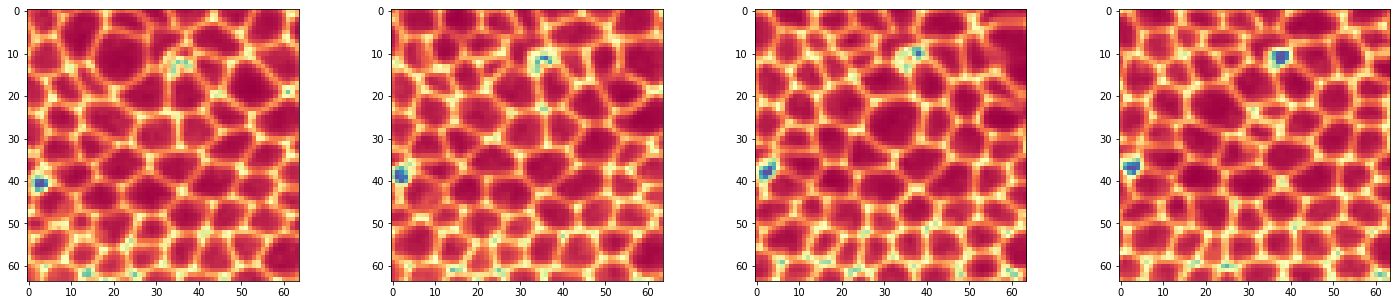

Epoch 36/250
27397/27397 [==============================] - 1347s 49ms/step - loss: 0.9758 - accuracy: 0.9974 - val_loss: 0.9847 - val_accuracy: 0.9827

Epoch 00036: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


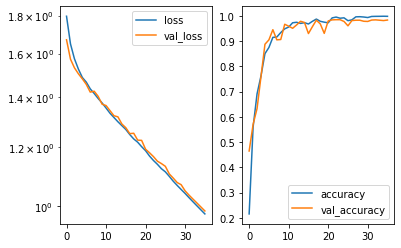

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
x [[0.510922]]
True positional value x 0.5
y [[0.49740452]]
True positional value y 0.5
t [[0.99603266]]
True positional value t 1.0
h [[0.28362468]]
True positional value h 0.25
w [[0.30137184]]
True positional value w 0.328125


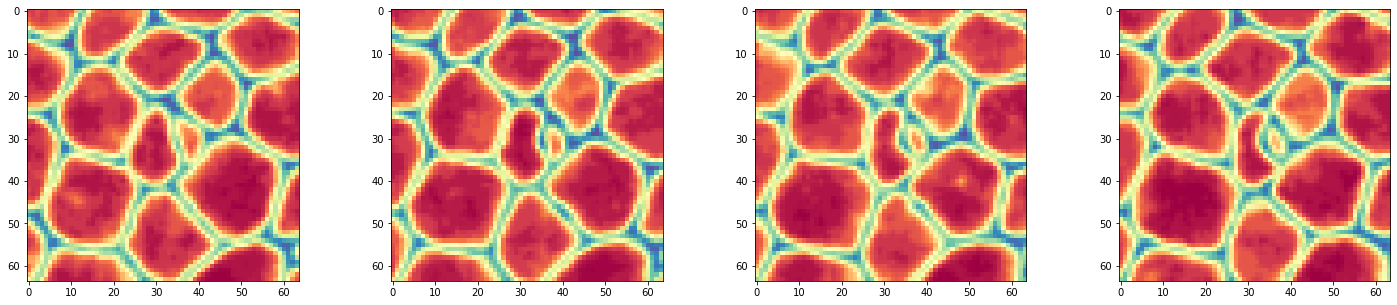

Epoch 37/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 0.9638 - accuracy: 0.9976 - val_loss: 0.9728 - val_accuracy: 0.9820

Epoch 00037: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


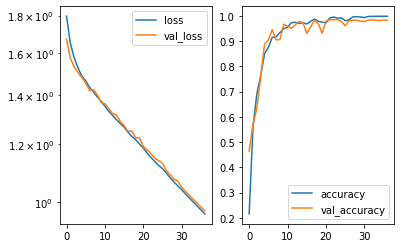

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.65740955]]
True positional value x 0.65625
y [[0.6567111]]
True positional value y 0.65625
t [[0.99742186]]
True positional value t 1.0
h [[0.4644896]]
True positional value h 0.484375
w [[0.42542997]]
True positional value w 0.40625


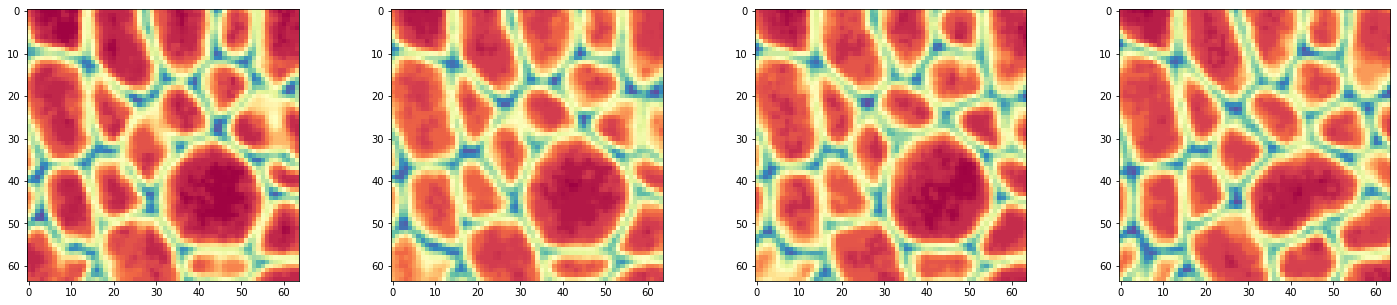

Epoch 38/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 0.9520 - accuracy: 0.9981 - val_loss: 0.9612 - val_accuracy: 0.9820

Epoch 00038: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


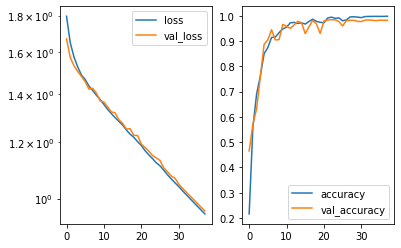

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.5165525]]
True positional value x 0.5
y [[0.43300924]]
True positional value y 0.5
t [[0.9994106]]
True positional value t 1.0
h [[0.17822775]]
True positional value h 0.171875
w [[0.2116995]]
True positional value w 0.203125


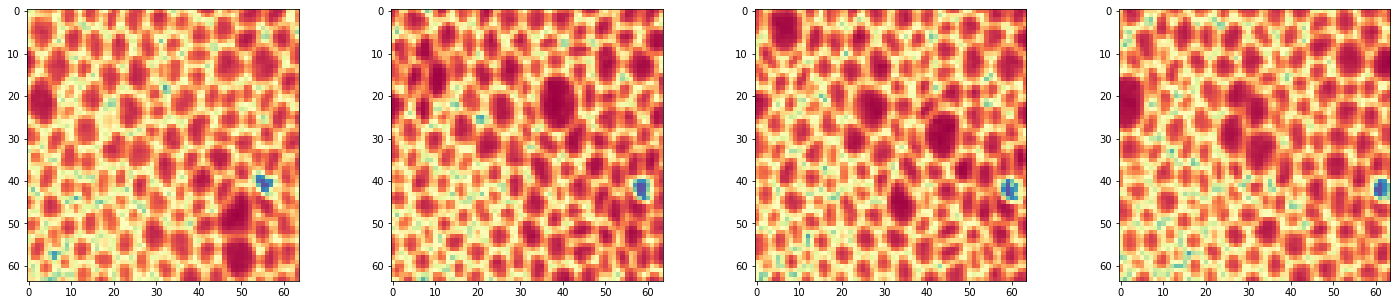

Epoch 39/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 0.9405 - accuracy: 0.9982 - val_loss: 0.9499 - val_accuracy: 0.9799

Epoch 00039: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


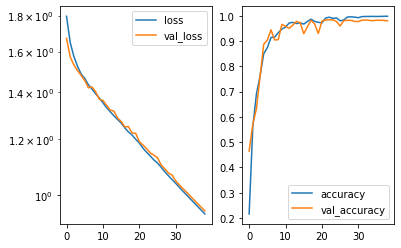

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.50320476]]
True positional value x 0.5
y [[0.6591815]]
True positional value y 0.65625
t [[0.99924374]]
True positional value t 1.0
h [[0.16395725]]
True positional value h 0.171875
w [[0.21709487]]
True positional value w 0.21875


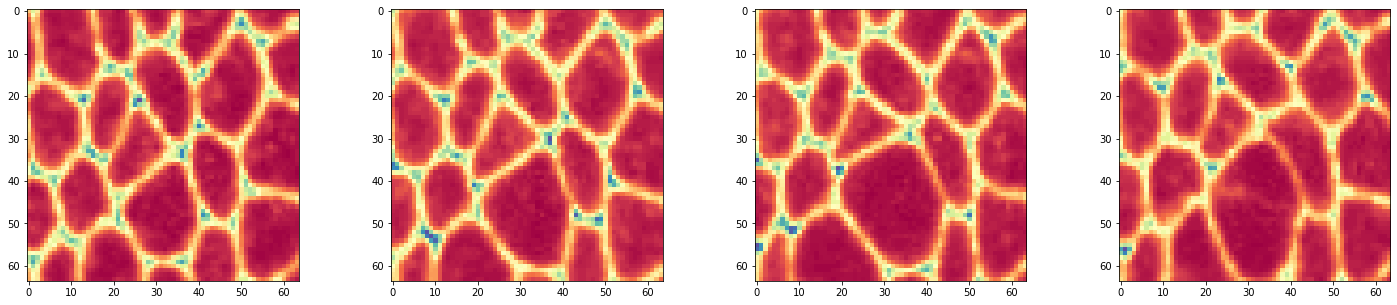

Epoch 40/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 0.9290 - accuracy: 0.9985 - val_loss: 0.9385 - val_accuracy: 0.9792

Epoch 00040: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


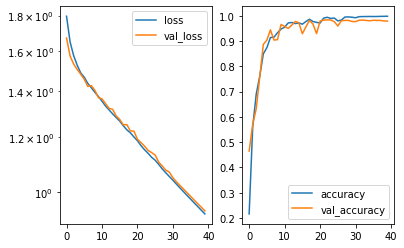

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.6666657]]
True positional value x 0.65625
y [[0.49317345]]
True positional value y 0.5
t [[0.9975085]]
True positional value t 1.0
h [[0.38329908]]
True positional value h 0.375
w [[0.5050277]]
True positional value w 0.515625


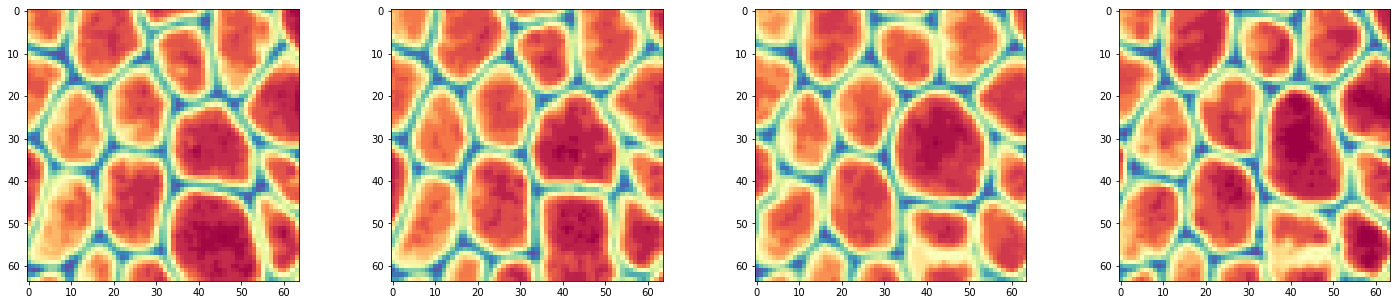

Epoch 41/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 0.9178 - accuracy: 0.9981 - val_loss: 0.9274 - val_accuracy: 0.9813

Epoch 00041: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


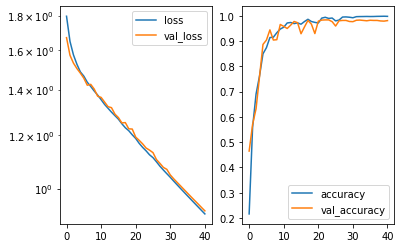

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.3535763]]
True positional value x 0.34375
y [[0.6318297]]
True positional value y 0.65625
t [[0.99955934]]
True positional value t 1.0
h [[0.23483588]]
True positional value h 0.234375
w [[0.3076553]]
True positional value w 0.34375


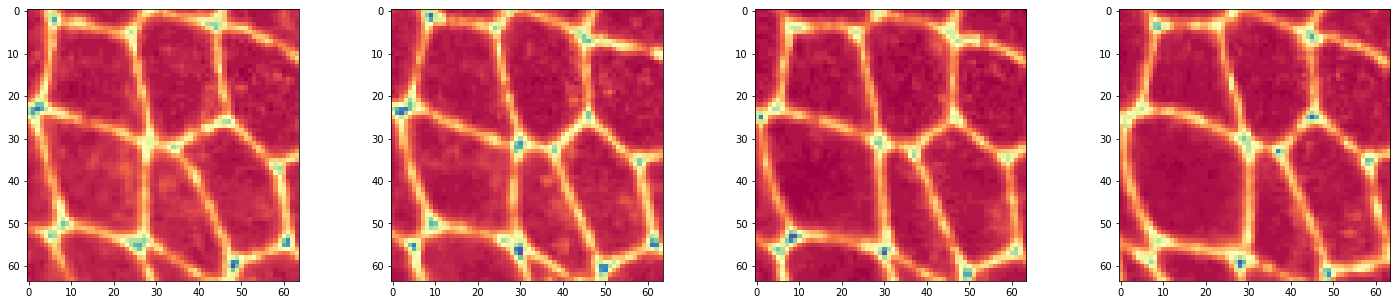

Epoch 42/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.9103 - accuracy: 0.9780 - val_loss: 0.9191 - val_accuracy: 0.9743

Epoch 00042: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


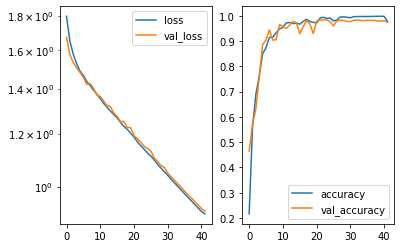

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.49774936]]
True positional value x 0.5
y [[0.6247812]]
True positional value y 0.65625
t [[0.9982905]]
True positional value t 1.0
h [[0.26067698]]
True positional value h 0.28125
w [[0.24332748]]
True positional value w 0.234375


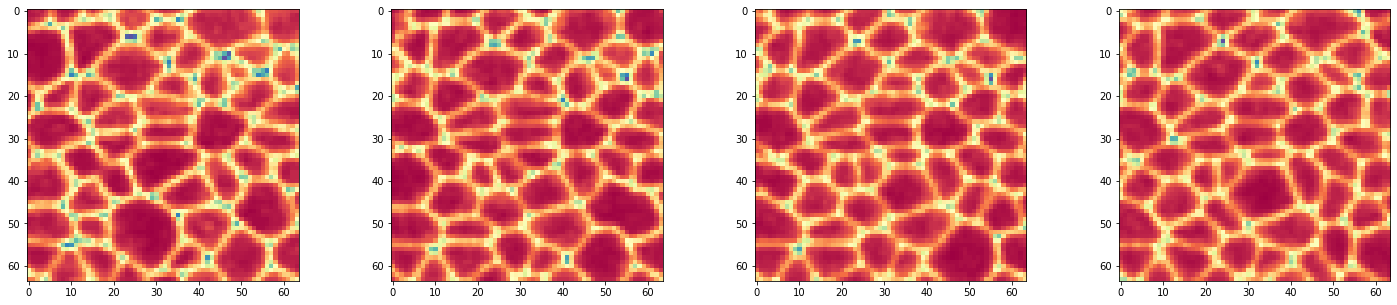

Epoch 43/250
27397/27397 [==============================] - 1346s 49ms/step - loss: 0.8975 - accuracy: 0.9927 - val_loss: 0.9075 - val_accuracy: 0.9785

Epoch 00043: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


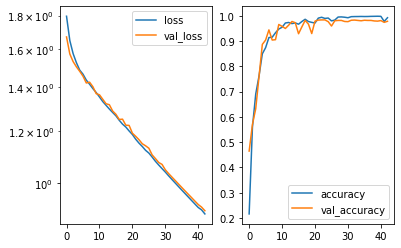

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.30120483]]
True positional value x 0.34375
y [[0.3076631]]
True positional value y 0.34375
t [[0.998665]]
True positional value t 1.0
h [[0.22456434]]
True positional value h 0.21875
w [[0.24515563]]
True positional value w 0.25


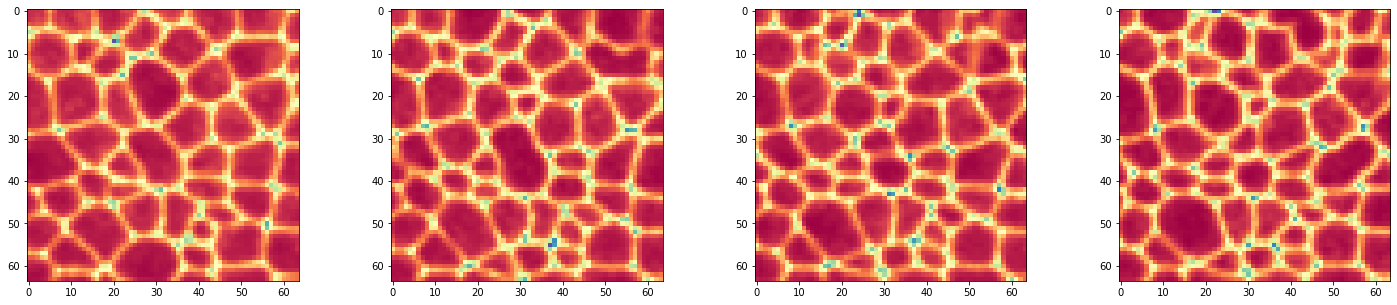

Epoch 44/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.8861 - accuracy: 0.9961 - val_loss: 0.8961 - val_accuracy: 0.9806

Epoch 00044: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


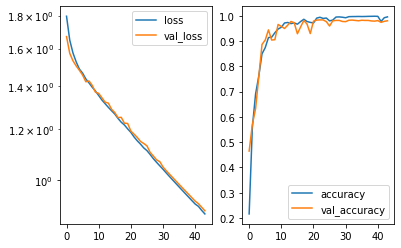

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.36180985]]
True positional value x 0.34375
y [[0.66578114]]
True positional value y 0.65625
t [[0.9971091]]
True positional value t 1.0
h [[0.36498538]]
True positional value h 0.375
w [[0.51549226]]
True positional value w 0.515625


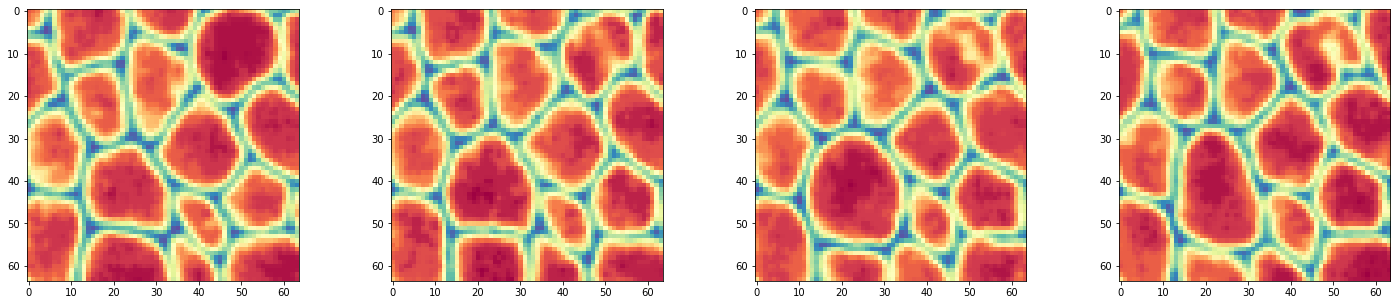

Epoch 45/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.8754 - accuracy: 0.9962 - val_loss: 0.8858 - val_accuracy: 0.9820

Epoch 00045: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


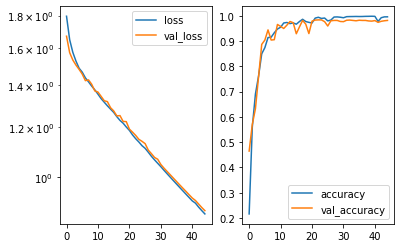

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.34171355]]
True positional value x 0.34375
y [[0.664706]]
True positional value y 0.65625
t [[0.99803764]]
True positional value t 1.0
h [[0.21586472]]
True positional value h 0.203125
w [[0.32701316]]
True positional value w 0.3125


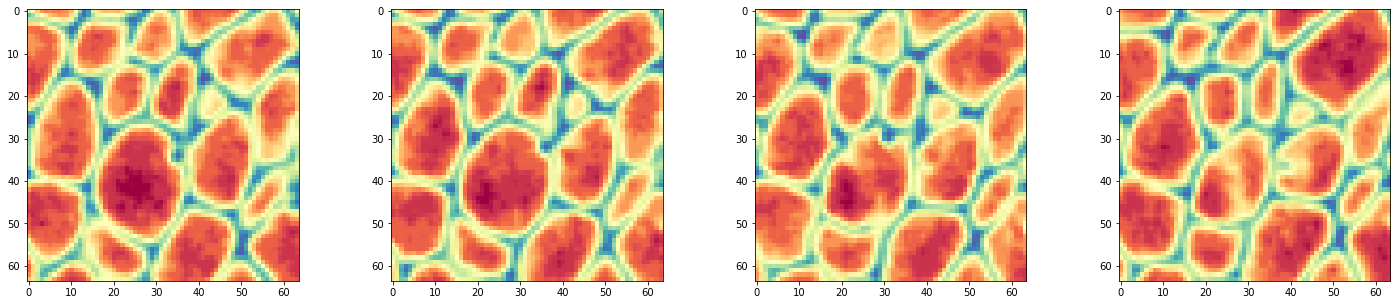

Epoch 46/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.8649 - accuracy: 0.9978 - val_loss: 0.8753 - val_accuracy: 0.9813

Epoch 00046: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


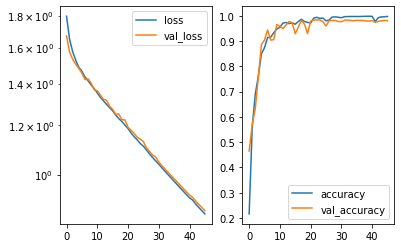

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.6624423]]
True positional value x 0.65625
y [[0.6604655]]
True positional value y 0.65625
t [[0.9983315]]
True positional value t 1.0
h [[0.29094175]]
True positional value h 0.328125
w [[0.19888732]]
True positional value w 0.1875


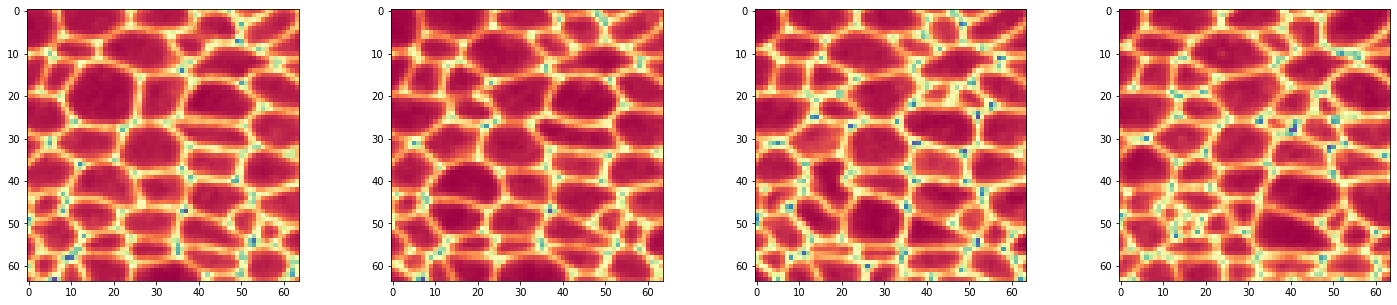

Epoch 47/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 0.8546 - accuracy: 0.9982 - val_loss: 0.8653 - val_accuracy: 0.9806

Epoch 00047: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


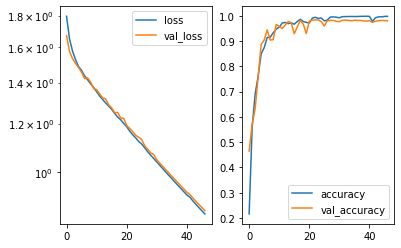

Predicted cell: Normal Probability: [[0.9999999]]
True Cell type: Normal
x [[0.45784292]]
True positional value x 0.5
y [[0.53149503]]
True positional value y 0.5
t [[0.99781334]]
True positional value t 1.0
h [[0.17451087]]
True positional value h 0.125
w [[0.19892658]]
True positional value w 0.109375


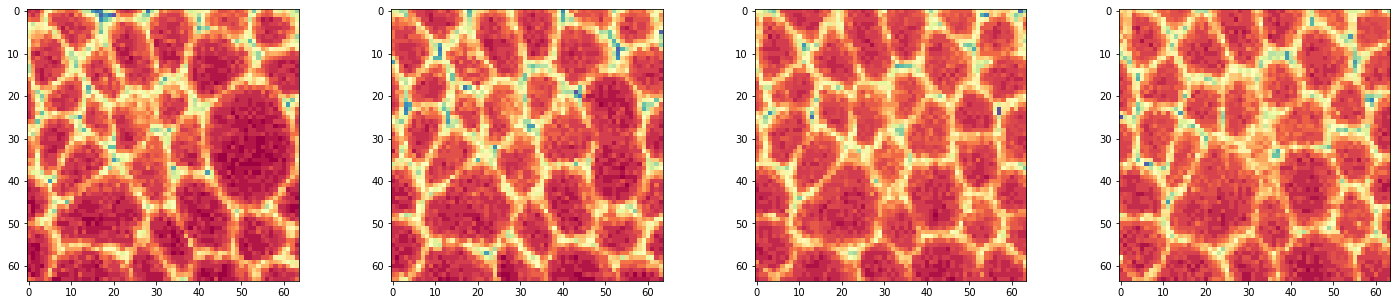

Epoch 48/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.8448 - accuracy: 0.9950 - val_loss: 0.8618 - val_accuracy: 0.9653

Epoch 00048: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


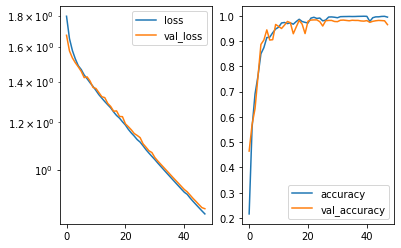

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.34265533]]
True positional value x 0.34375
y [[0.66573024]]
True positional value y 0.65625
t [[0.9987866]]
True positional value t 1.0
h [[0.19772391]]
True positional value h 0.171875
w [[0.18628657]]
True positional value w 0.203125


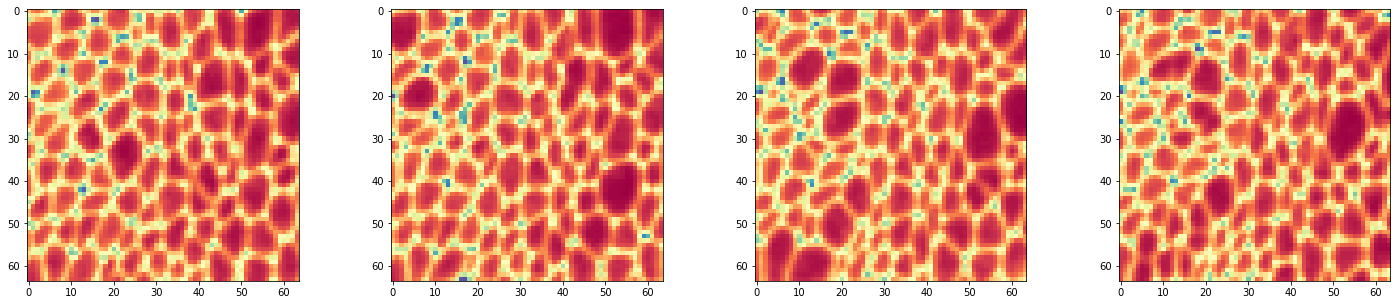

Epoch 49/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.8353 - accuracy: 0.9947 - val_loss: 0.8457 - val_accuracy: 0.9827

Epoch 00049: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


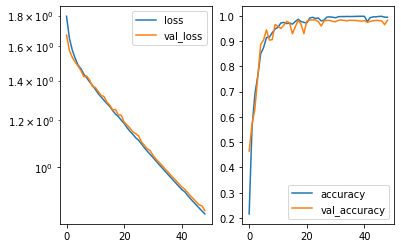

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.67463493]]
True positional value x 0.65625
y [[0.51595247]]
True positional value y 0.5
t [[0.9985405]]
True positional value t 1.0
h [[0.25441673]]
True positional value h 0.28125
w [[0.25769386]]
True positional value w 0.265625


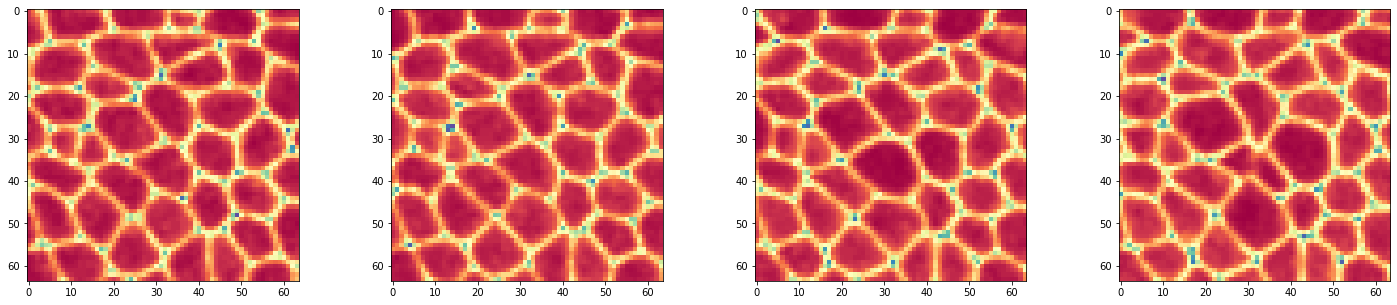

Epoch 50/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 0.8250 - accuracy: 0.9972 - val_loss: 0.8358 - val_accuracy: 0.9820

Epoch 00050: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


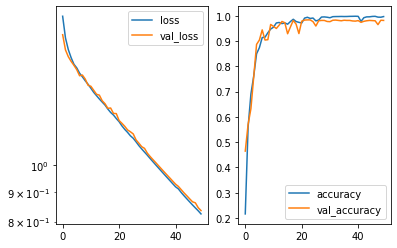

Predicted cell: Division Probability: [[0.9999968]]
True Cell type: Division
x [[0.3466387]]
True positional value x 0.34375
y [[0.3858275]]
True positional value y 0.34375
t [[0.999571]]
True positional value t 1.0
h [[0.09102163]]
True positional value h 0.09375
w [[0.11648189]]
True positional value w 0.09375


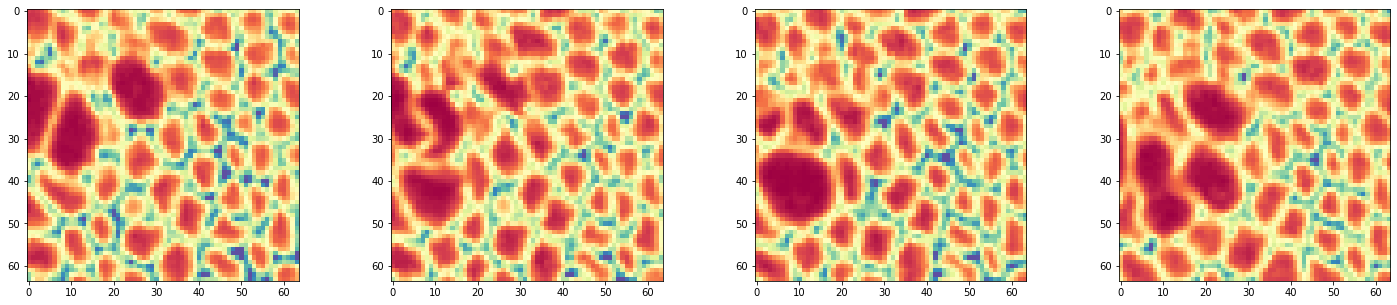

Epoch 51/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.8152 - accuracy: 0.9978 - val_loss: 0.8264 - val_accuracy: 0.9827

Epoch 00051: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


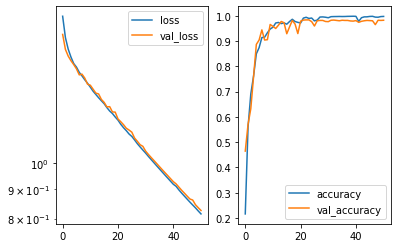

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.6570355]]
True positional value x 0.65625
y [[0.48611847]]
True positional value y 0.5
t [[0.99815255]]
True positional value t 1.0
h [[0.27485985]]
True positional value h 0.28125
w [[0.34310678]]
True positional value w 0.359375


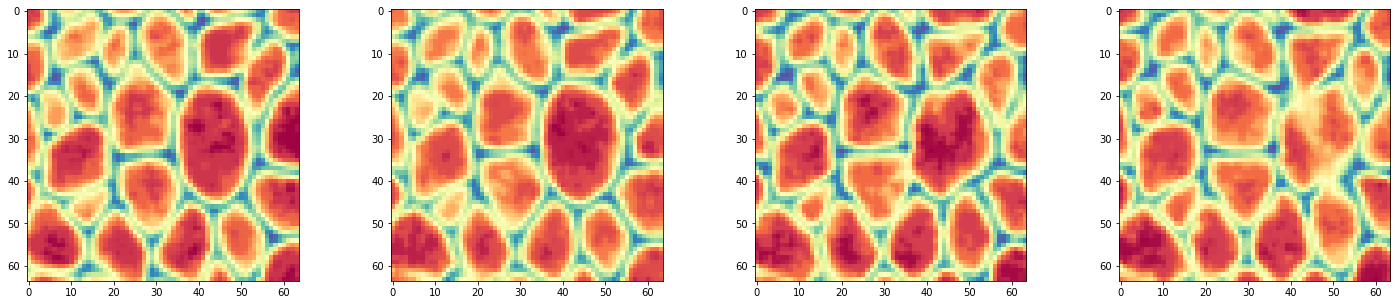

Epoch 52/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.8057 - accuracy: 0.9986 - val_loss: 0.8173 - val_accuracy: 0.9827

Epoch 00052: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


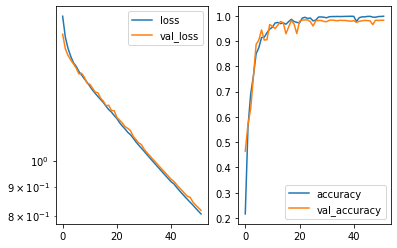

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.35773262]]
True positional value x 0.34375
y [[0.48349994]]
True positional value y 0.5
t [[0.9995492]]
True positional value t 1.0
h [[0.19194293]]
True positional value h 0.203125
w [[0.21481103]]
True positional value w 0.203125


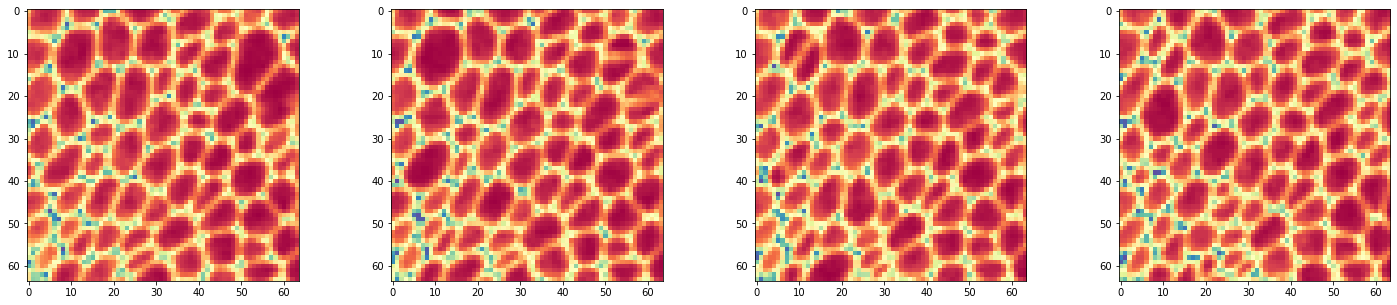

Epoch 53/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 0.7963 - accuracy: 0.9979 - val_loss: 0.8083 - val_accuracy: 0.9820

Epoch 00053: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


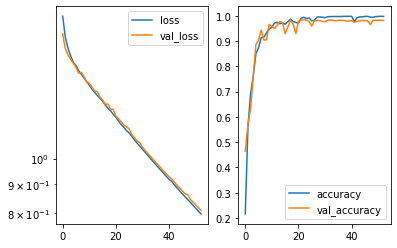

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.49719498]]
True positional value x 0.5
y [[0.5046044]]
True positional value y 0.5
t [[0.9984665]]
True positional value t 1.0
h [[0.3648611]]
True positional value h 0.390625
w [[0.49189845]]
True positional value w 0.5


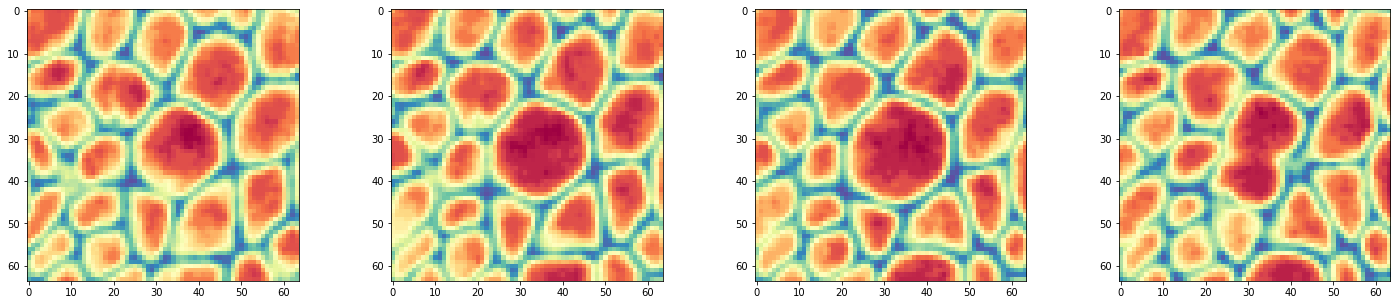

Epoch 54/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 0.7871 - accuracy: 0.9984 - val_loss: 0.7989 - val_accuracy: 0.9834

Epoch 00054: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


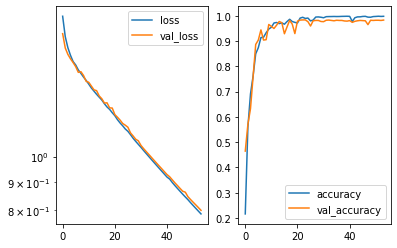

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.6567174]]
True positional value x 0.65625
y [[0.34155348]]
True positional value y 0.34375
t [[0.99929225]]
True positional value t 1.0
h [[0.47799987]]
True positional value h 0.453125
w [[0.67783076]]
True positional value w 0.671875


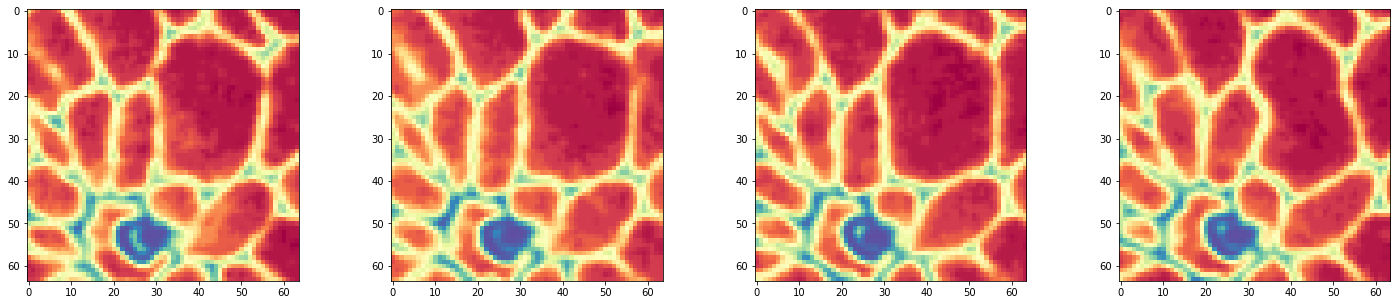

Epoch 55/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.7780 - accuracy: 0.9982 - val_loss: 0.7899 - val_accuracy: 0.9820

Epoch 00055: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


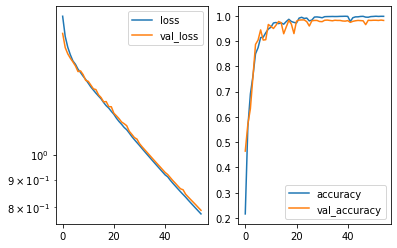

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.48589432]]
True positional value x 0.5
y [[0.36620197]]
True positional value y 0.34375
t [[0.998705]]
True positional value t 1.0
h [[0.42978886]]
True positional value h 0.359375
w [[0.3541877]]
True positional value w 0.390625


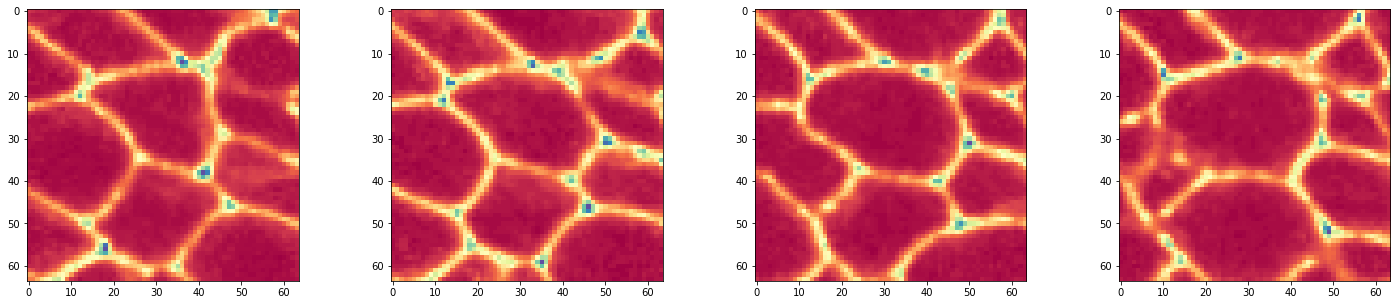

Epoch 56/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 0.7691 - accuracy: 0.9984 - val_loss: 0.7809 - val_accuracy: 0.9820

Epoch 00056: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


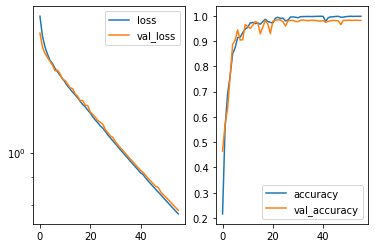

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.5497564]]
True positional value x 0.5
y [[0.34117547]]
True positional value y 0.34375
t [[0.9989641]]
True positional value t 1.0
h [[0.27692354]]
True positional value h 0.234375
w [[0.3659745]]
True positional value w 0.296875


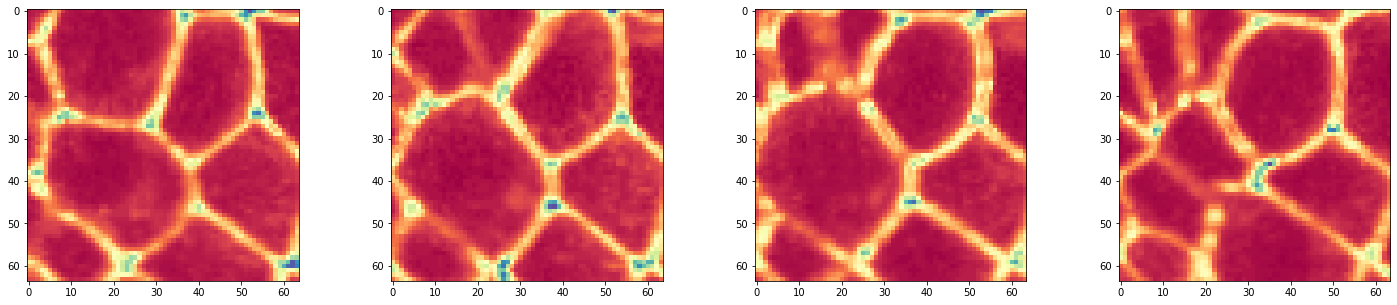

Epoch 57/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 0.7602 - accuracy: 0.9983 - val_loss: 0.7724 - val_accuracy: 0.9806

Epoch 00057: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


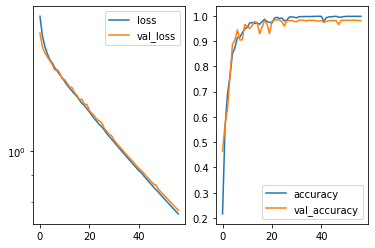

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.5135506]]
True positional value x 0.5
y [[0.3582187]]
True positional value y 0.34375
t [[0.9988154]]
True positional value t 1.0
h [[0.33018965]]
True positional value h 0.3125
w [[0.21855466]]
True positional value w 0.21875


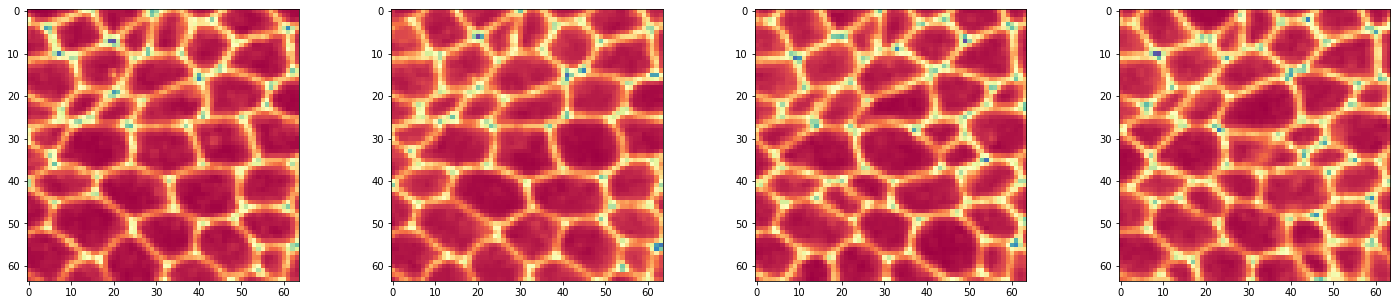

Epoch 58/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 0.7515 - accuracy: 0.9986 - val_loss: 0.7636 - val_accuracy: 0.9813

Epoch 00058: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


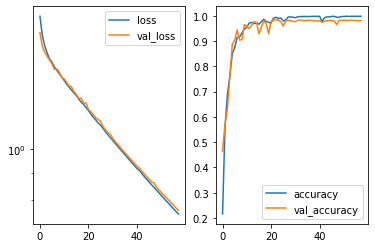

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.48308614]]
True positional value x 0.5
y [[0.37306485]]
True positional value y 0.34375
t [[0.9992472]]
True positional value t 1.0
h [[0.29766262]]
True positional value h 0.328125
w [[0.19625898]]
True positional value w 0.234375


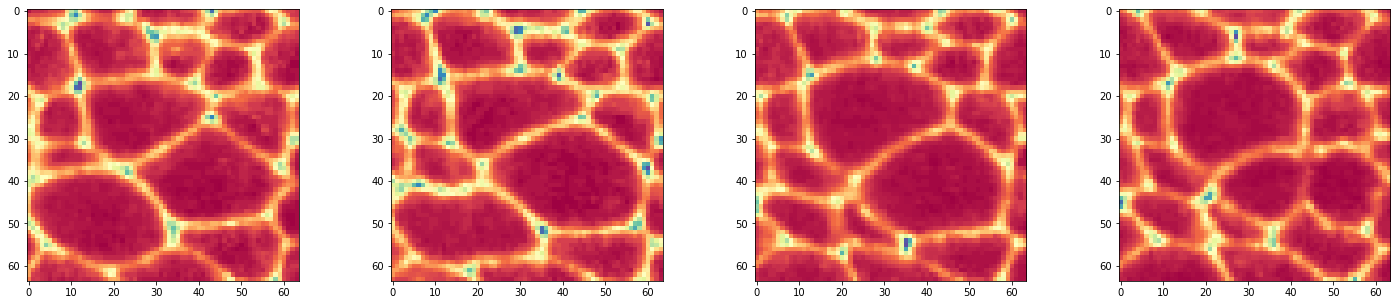

Epoch 59/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.7430 - accuracy: 0.9985 - val_loss: 0.7548 - val_accuracy: 0.9813

Epoch 00059: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


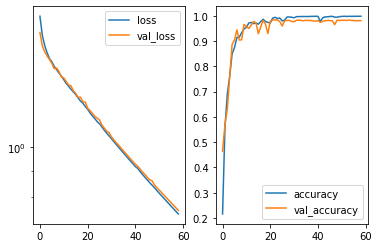

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.5099433]]
True positional value x 0.5
y [[0.64853305]]
True positional value y 0.65625
t [[0.99932504]]
True positional value t 1.0
h [[0.16174006]]
True positional value h 0.15625
w [[0.15637964]]
True positional value w 0.15625


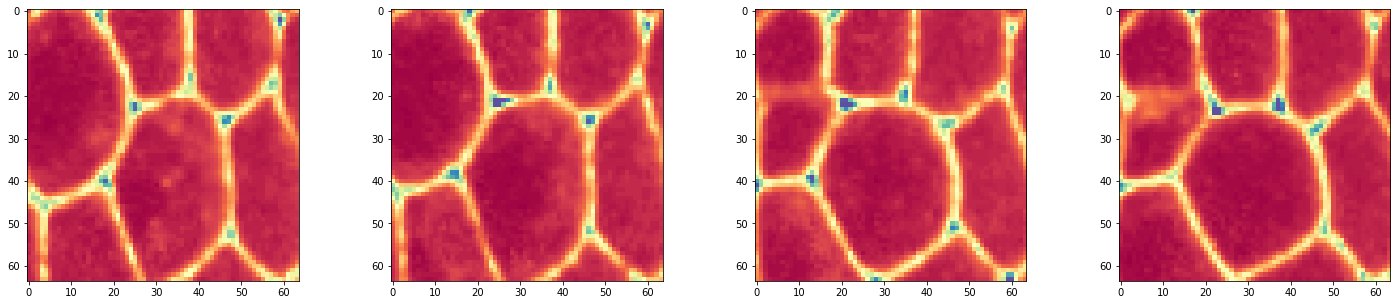

Epoch 60/250
27397/27397 [==============================] - 1344s 49ms/step - loss: 0.7345 - accuracy: 0.9983 - val_loss: 0.7469 - val_accuracy: 0.9820

Epoch 00060: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


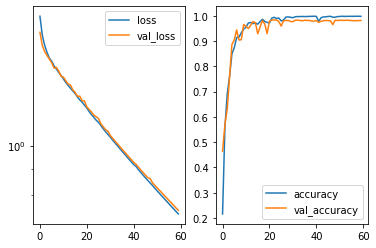

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.3386501]]
True positional value x 0.34375
y [[0.67115295]]
True positional value y 0.65625
t [[0.9974433]]
True positional value t 1.0
h [[0.43445164]]
True positional value h 0.4375
w [[0.4679579]]
True positional value w 0.453125


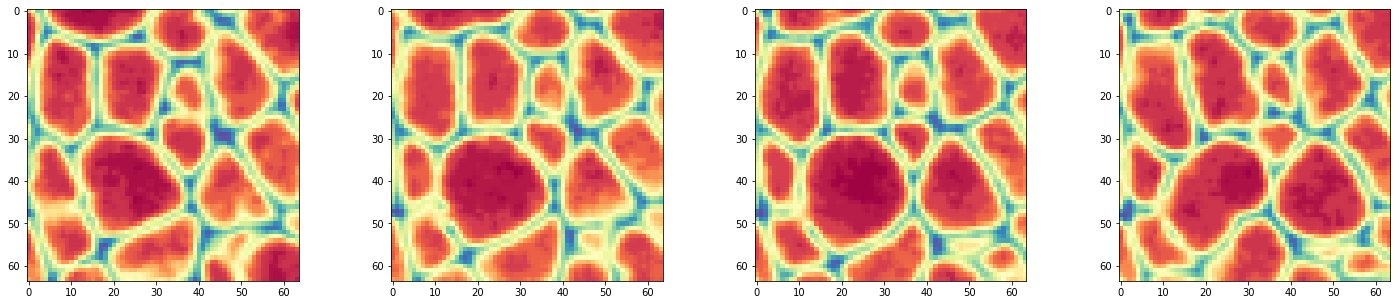

Epoch 61/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.7262 - accuracy: 0.9978 - val_loss: 0.7390 - val_accuracy: 0.9813

Epoch 00061: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


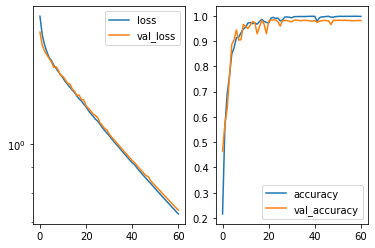

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.66374284]]
True positional value x 0.65625
y [[0.33198243]]
True positional value y 0.34375
t [[0.99886936]]
True positional value t 1.0
h [[0.39193866]]
True positional value h 0.390625
w [[0.49490365]]
True positional value w 0.484375


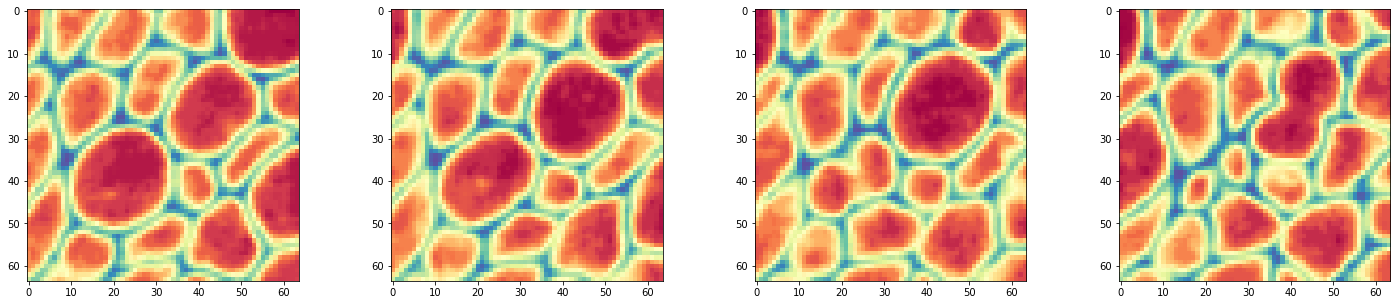

Epoch 62/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.7180 - accuracy: 0.9978 - val_loss: 0.7307 - val_accuracy: 0.9813

Epoch 00062: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


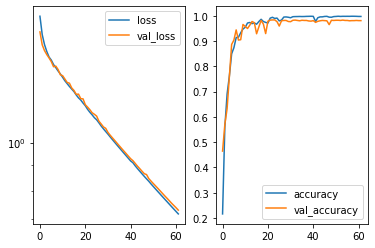

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
x [[0.49994123]]
True positional value x 0.5
y [[0.49716774]]
True positional value y 0.5
t [[0.9990728]]
True positional value t 1.0
h [[0.2323699]]
True positional value h 0.296875
w [[0.21480326]]
True positional value w 0.3125


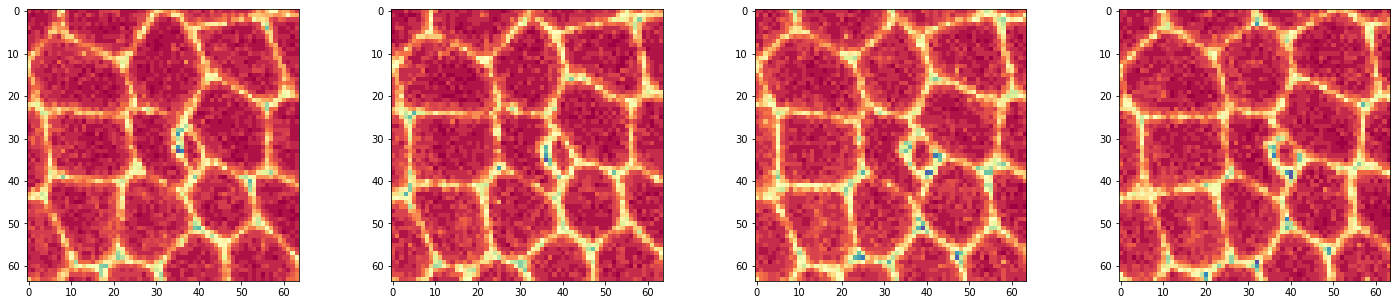

Epoch 63/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.7099 - accuracy: 0.9985 - val_loss: 0.7226 - val_accuracy: 0.9806

Epoch 00063: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


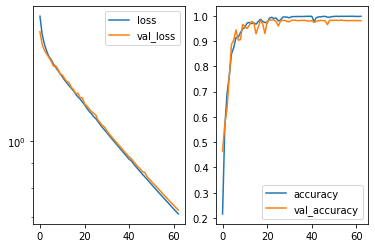

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.66209036]]
True positional value x 0.65625
y [[0.5103853]]
True positional value y 0.5
t [[0.99987006]]
True positional value t 1.0
h [[0.12953511]]
True positional value h 0.15625
w [[0.15307778]]
True positional value w 0.15625


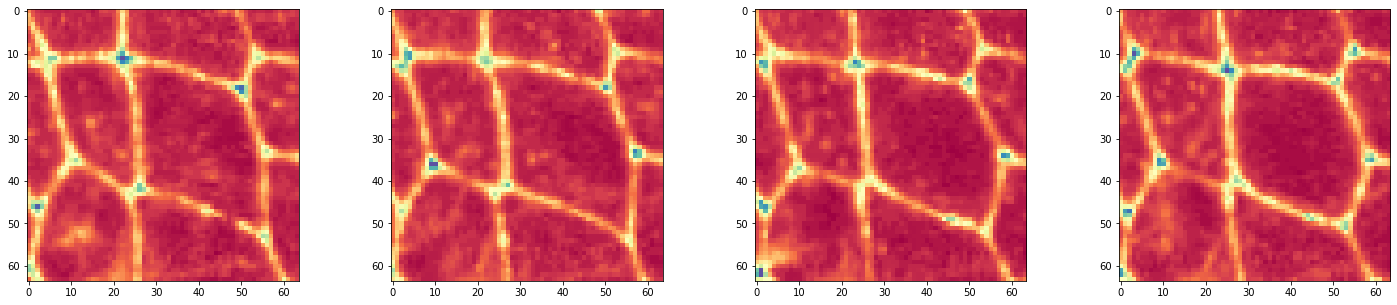

Epoch 64/250
27397/27397 [==============================] - 1345s 49ms/step - loss: 0.7019 - accuracy: 0.9982 - val_loss: 0.7145 - val_accuracy: 0.9806

Epoch 00064: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


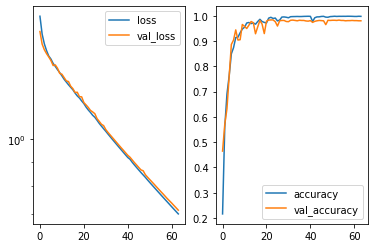

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.65306467]]
True positional value x 0.65625
y [[0.37822872]]
True positional value y 0.34375
t [[0.9990451]]
True positional value t 1.0
h [[0.16725639]]
True positional value h 0.15625
w [[0.19881052]]
True positional value w 0.15625


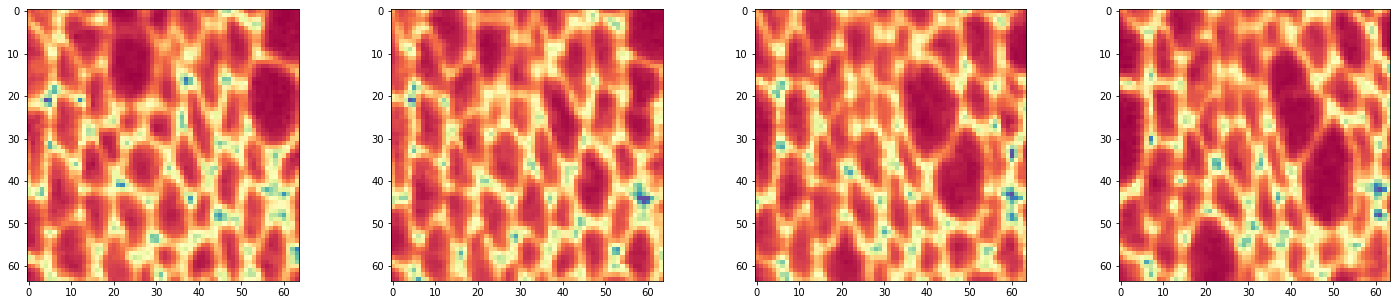

Epoch 65/250
27397/27397 [==============================] - 1358s 50ms/step - loss: 0.6941 - accuracy: 0.9986 - val_loss: 0.7069 - val_accuracy: 0.9799

Epoch 00065: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


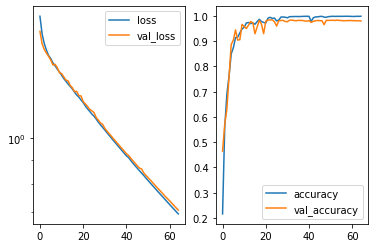

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
x [[0.49700397]]
True positional value x 0.5
y [[0.50496894]]
True positional value y 0.5
t [[0.9984592]]
True positional value t 1.0
h [[0.26412082]]
True positional value h 0.28125
w [[0.2470068]]
True positional value w 0.296875


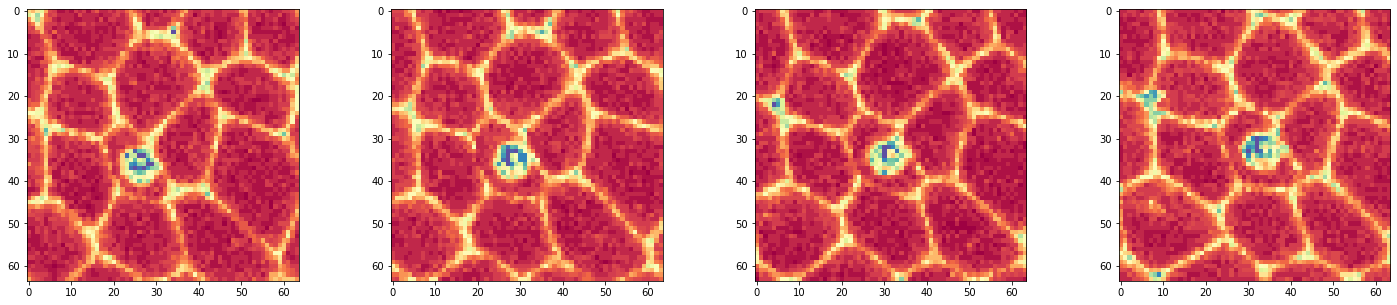

Epoch 66/250
27397/27397 [==============================] - 1381s 50ms/step - loss: 0.6863 - accuracy: 0.9981 - val_loss: 0.6990 - val_accuracy: 0.9799

Epoch 00066: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


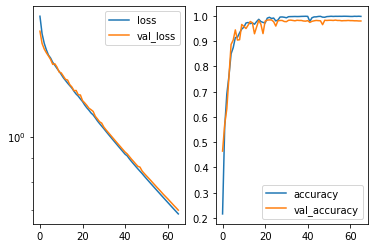

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.4723578]]
True positional value x 0.5
y [[0.34648216]]
True positional value y 0.34375
t [[0.99928075]]
True positional value t 1.0
h [[0.42701116]]
True positional value h 0.390625
w [[0.5474596]]
True positional value w 0.53125


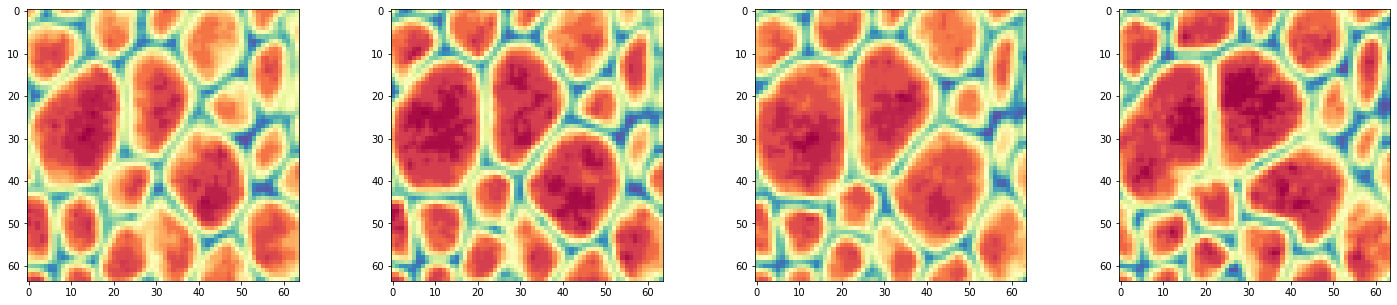

Epoch 67/250
27397/27397 [==============================] - 1367s 50ms/step - loss: 0.6787 - accuracy: 0.9984 - val_loss: 0.6917 - val_accuracy: 0.9813

Epoch 00067: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


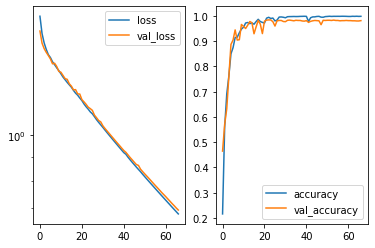

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.5026515]]
True positional value x 0.5
y [[0.6677463]]
True positional value y 0.65625
t [[0.9989641]]
True positional value t 1.0
h [[0.48437032]]
True positional value h 0.46875
w [[0.31831908]]
True positional value w 0.3125


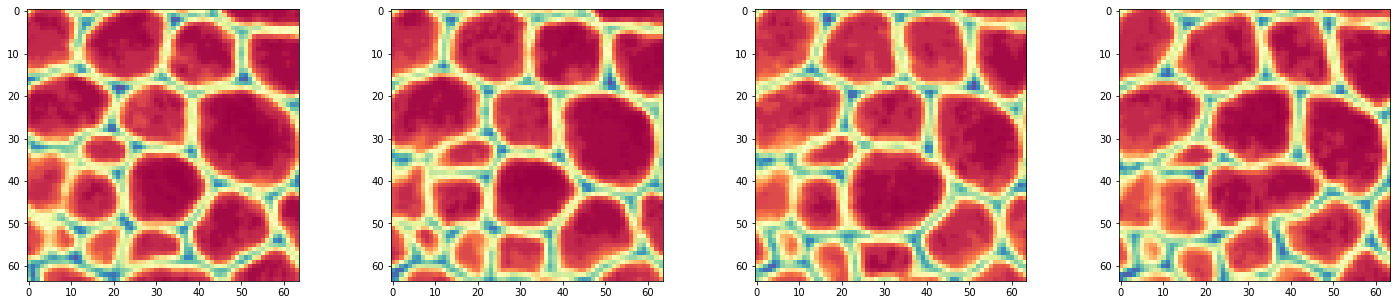

Epoch 68/250
27397/27397 [==============================] - 1334s 49ms/step - loss: 0.6712 - accuracy: 0.9982 - val_loss: 0.6841 - val_accuracy: 0.9799

Epoch 00068: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


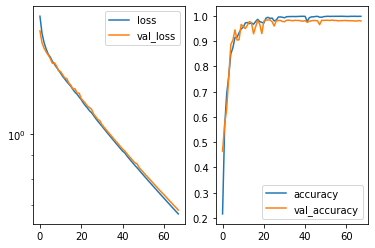

Predicted cell: Normal Probability: [[1.]]
True Cell type: Normal
x [[0.50121486]]
True positional value x 0.5
y [[0.50957245]]
True positional value y 0.5
t [[0.9991769]]
True positional value t 1.0
h [[0.07771549]]
True positional value h 0.15625
w [[0.05525176]]
True positional value w 0.15625


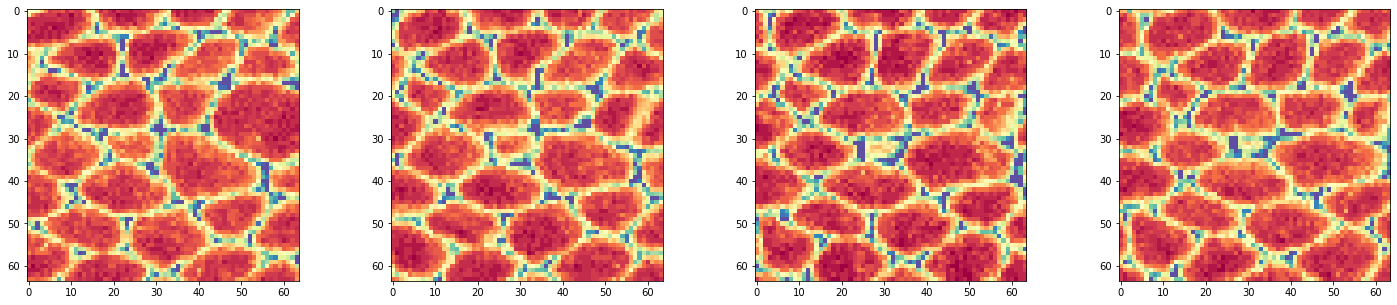

Epoch 69/250
27397/27397 [==============================] - 1362s 50ms/step - loss: 0.6637 - accuracy: 0.9982 - val_loss: 0.6768 - val_accuracy: 0.9792

Epoch 00069: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


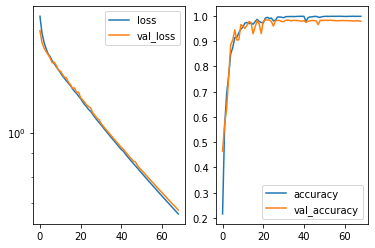

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.62878036]]
True positional value x 0.65625
y [[0.51692647]]
True positional value y 0.5
t [[0.9987645]]
True positional value t 1.0
h [[0.2457848]]
True positional value h 0.296875
w [[0.18456194]]
True positional value w 0.203125


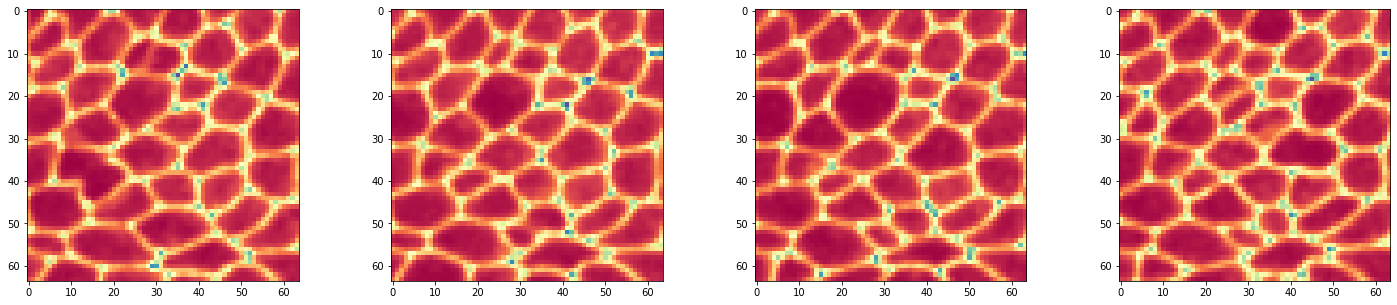

Epoch 70/250
27397/27397 [==============================] - 1365s 50ms/step - loss: 0.6564 - accuracy: 0.9977 - val_loss: 0.6701 - val_accuracy: 0.9757

Epoch 00070: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


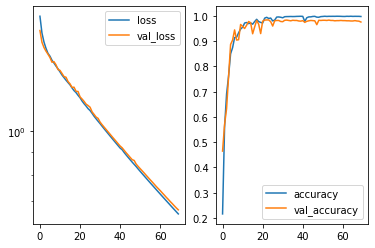

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.3465771]]
True positional value x 0.34375
y [[0.49550605]]
True positional value y 0.5
t [[0.99961215]]
True positional value t 1.0
h [[0.20534898]]
True positional value h 0.1875
w [[0.23548117]]
True positional value w 0.203125


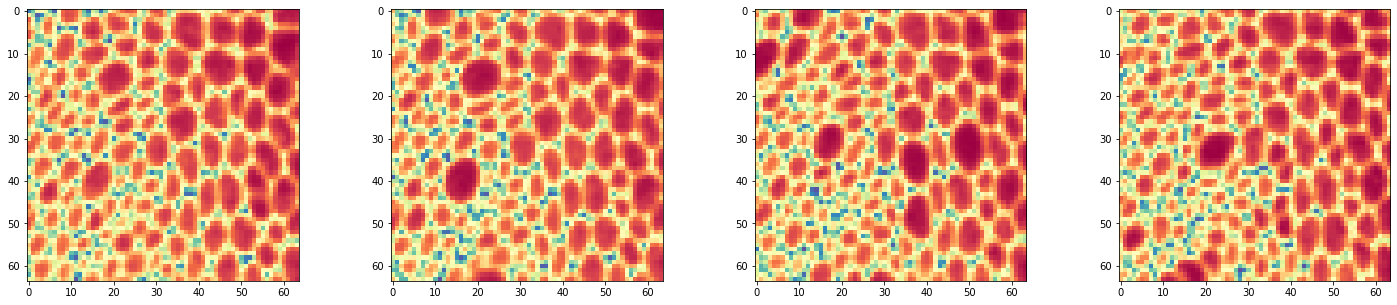

Epoch 71/250
27397/27397 [==============================] - 1374s 50ms/step - loss: 0.6492 - accuracy: 0.9976 - val_loss: 0.6619 - val_accuracy: 0.9785

Epoch 00071: saving model to /home/sancere/Kepler/FinalONEATTraining/Microneatmodel/offsetmicroseqnetbin2d56.h5


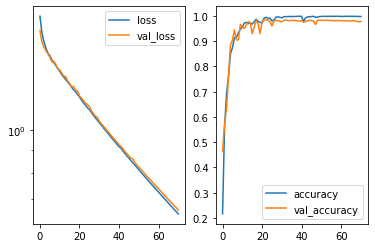

Predicted cell: Division Probability: [[1.]]
True Cell type: Division
x [[0.52435786]]
True positional value x 0.5
y [[0.37874502]]
True positional value y 0.34375
t [[0.9989697]]
True positional value t 1.0
h [[0.13342185]]
True positional value h 0.15625
w [[0.14546451]]
True positional value w 0.15625


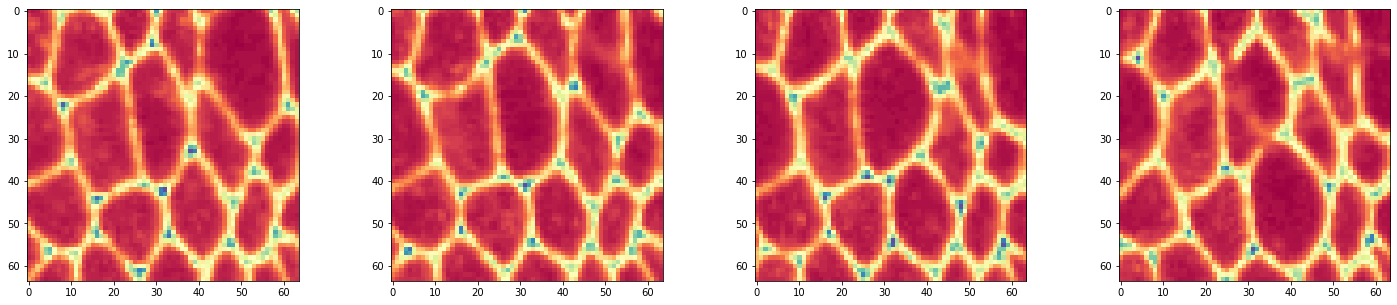

Epoch 72/250
 9784/27397 [=========>....................] - ETA: 14:36 - loss: 0.6442 - accuracy: 0.9986

KeyboardInterrupt: 

In [5]:
Train = NEATDynamic(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()
